In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import pandas as pd
import os
import torch
import glob

# read data

In [2]:
def load_spectra(data_path):
    files = sorted(glob.glob(os.path.join(data_path, "*.csv.gz")))
    tb_spectra = []
    tau = []
    for fp in files:
        df = pd.read_csv(fp)
        tb_spectra.append(df.iloc[:, 1].values.astype(np.float32))   # TB column
        tau.append(df.iloc[:, 2].values.astype(np.float32))      # tau column
    return np.asarray(tb_spectra),np.asarray(tau)  # (N, 201)

In [3]:
DATAPATH_BASE = '../../data/'
FITS_PATH     = os.path.join(DATAPATH_BASE, 'fcnm_RHI_z.fits')
CSV_DIR       = os.path.join(DATAPATH_BASE, 'syn_HI_spec_z')

TB,tau = load_spectra(CSV_DIR) 

In [4]:
hdul  = fits.open(FITS_PATH)
fcnm  = hdul[1].data.flatten().astype(np.float32)
RHI   = hdul[2].data.flatten().astype(np.float32)

In [5]:
TB.shape, tau.shape, fcnm.shape, RHI.shape

((262144, 201), (262144, 201), (262144,), (262144,))

Text(0, 0.5, 'Optical Depth')

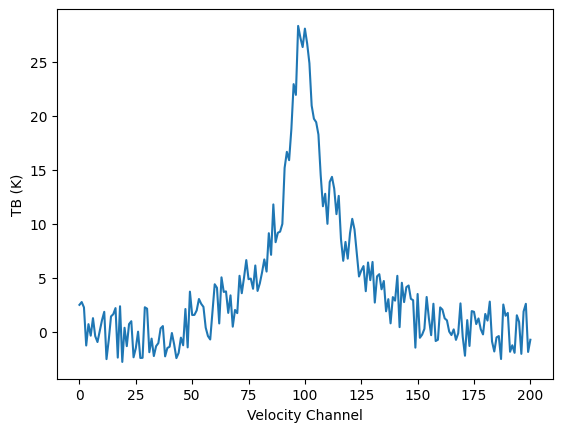

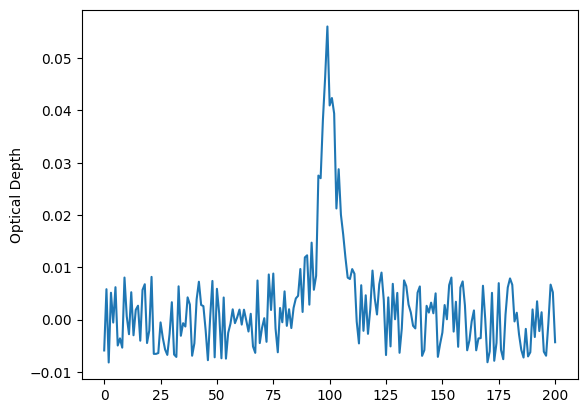

In [6]:
plt.figure
plt.plot(TB[0])
plt.ylabel('TB (K)')
plt.xlabel('Velocity Channel')

plt.figure()
plt.plot(tau[0])
plt.ylabel('Optical Depth')

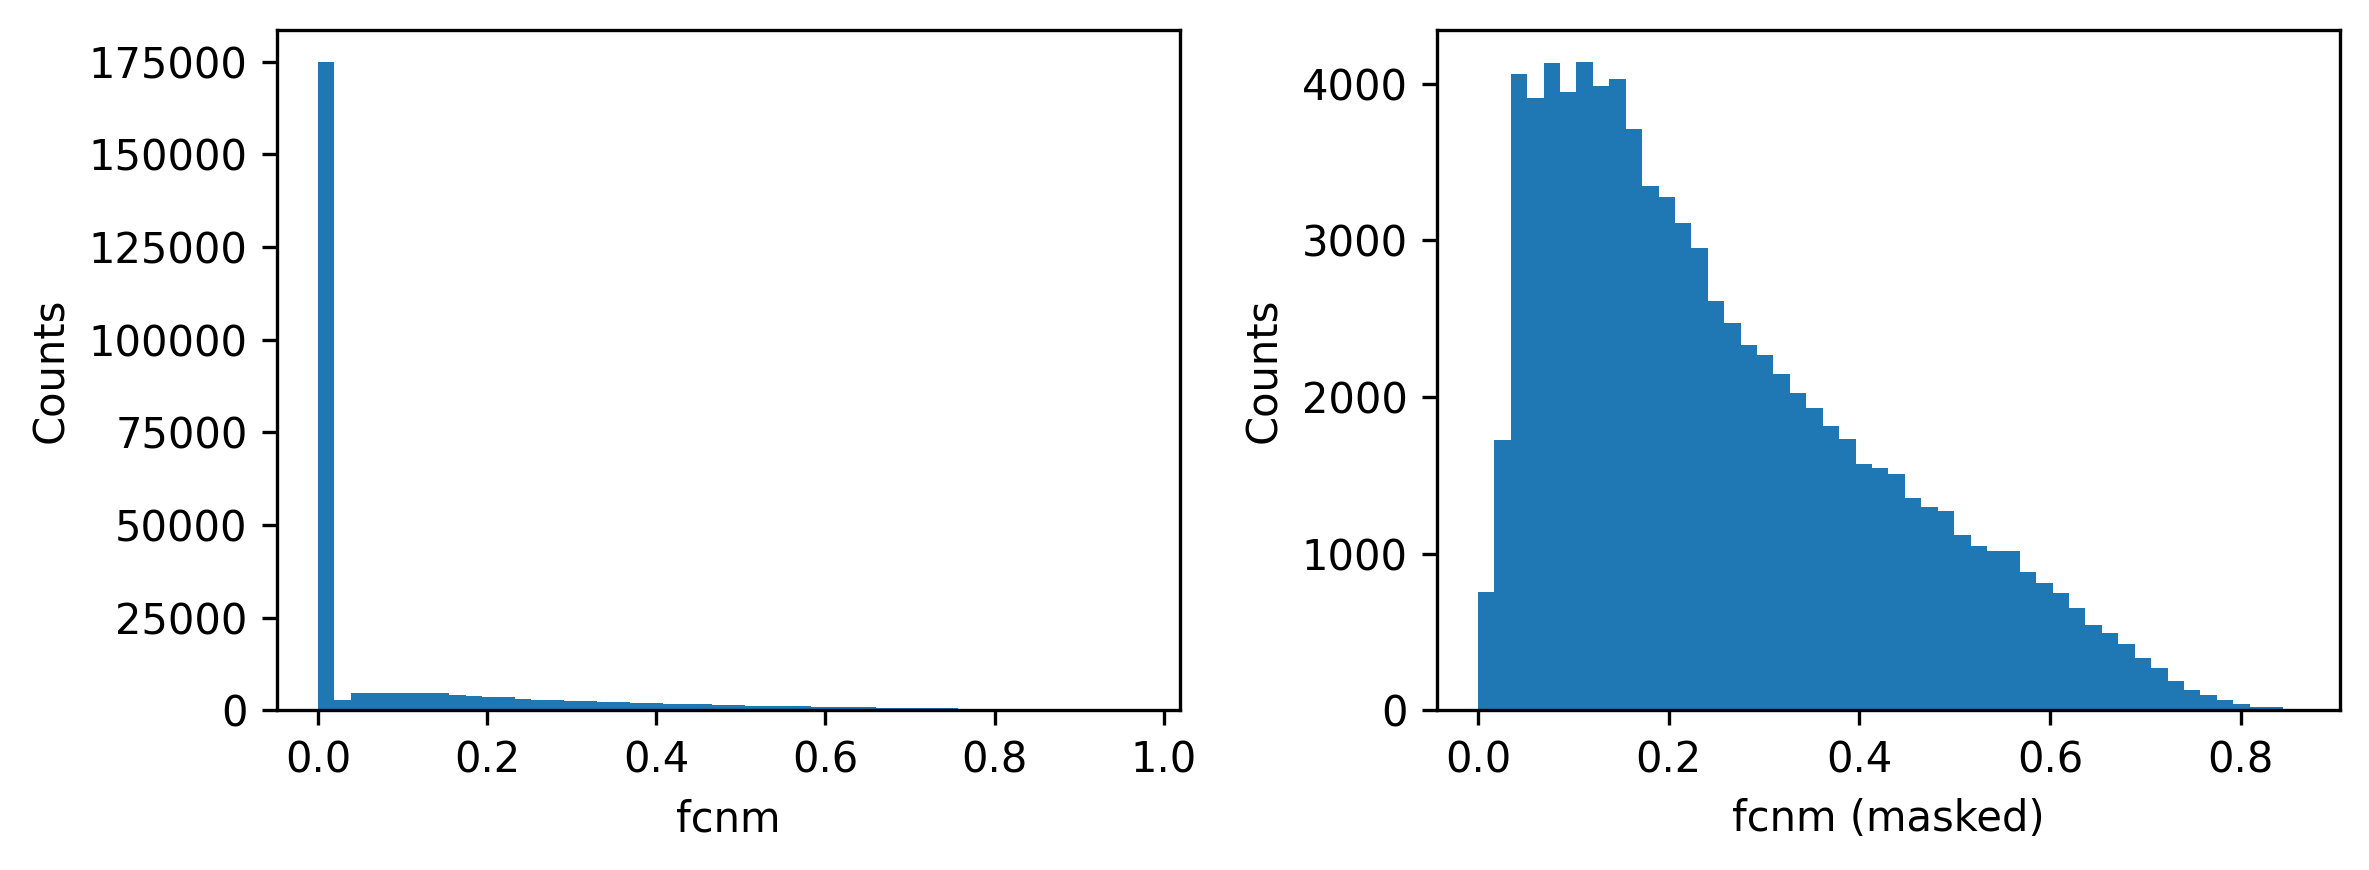

In [36]:
mask = (RHI < 2) & (fcnm > 0)
plt.figure(figsize=(8,3),dpi=300)
plt.subplot(121)
plt.hist(fcnm,bins=50)
plt.xlabel('fcnm')
plt.ylabel('Counts')

plt.subplot(122)
plt.hist(fcnm[mask],bins=50)
plt.xlabel('fcnm (masked)')
plt.ylabel('Counts')

plt.tight_layout()

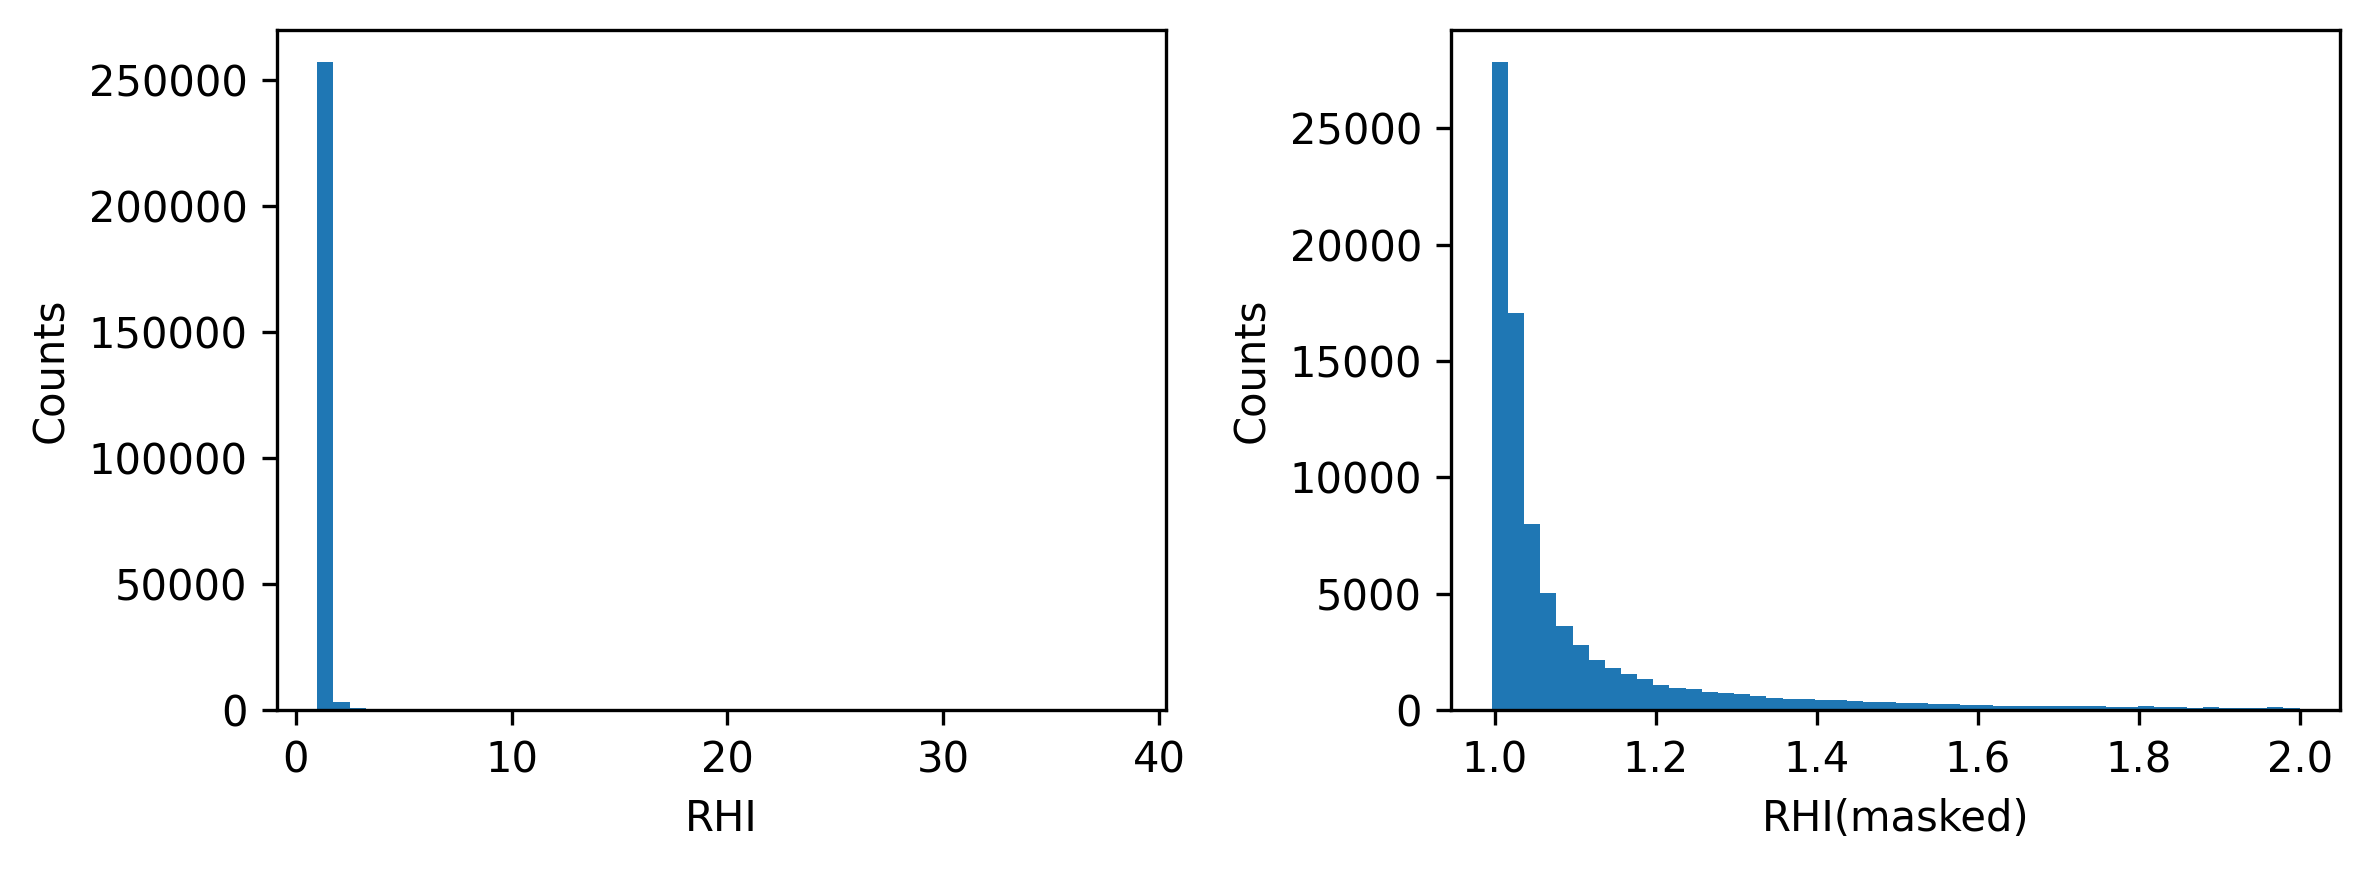

In [37]:
mask = (RHI < 2) & (fcnm > 0) 
plt.figure(figsize=(8,3),dpi=300)
plt.subplot(121)
plt.hist(RHI,bins=50)
plt.xlabel('RHI')
plt.ylabel('Counts')

plt.subplot(122)
plt.hist(RHI[mask],bins=50)
plt.xlabel('RHI(masked)')
plt.ylabel('Counts')
plt.tight_layout()

# evaluate each model

## model 1


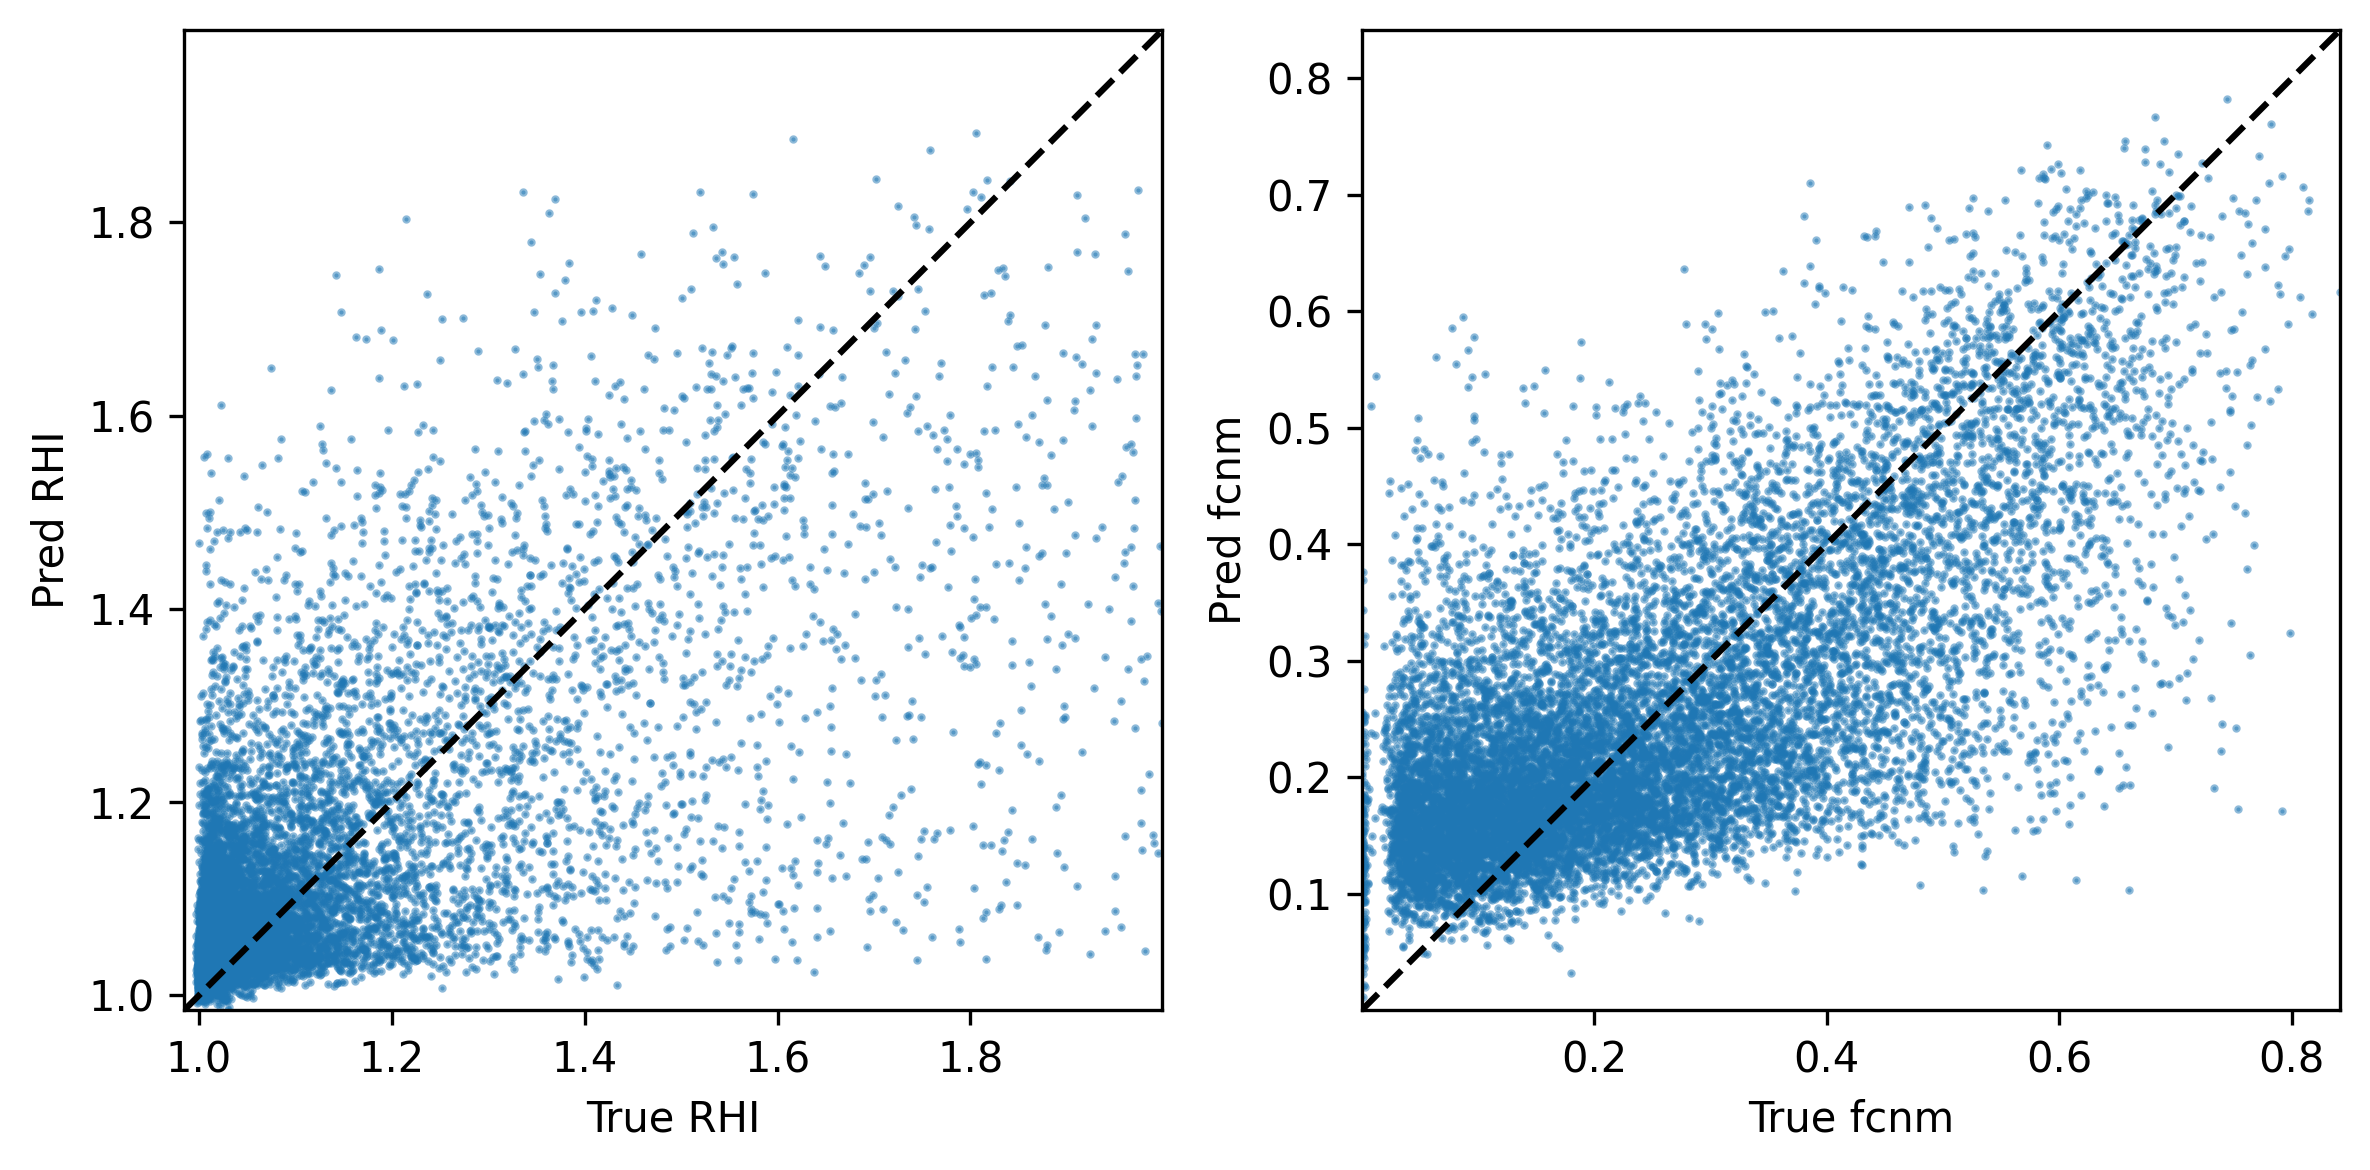

In [16]:
m1=pd.read_csv('1_test_predictions20251120_020242.csv')
plt.figure(figsize=(8,4),dpi=300)
plt.subplot(121)
plt.scatter(m1['RHI_true'],m1['RHI_pred'],s=1,alpha=0.5)
lo, hi = float(min(m1['RHI_true'].min(), m1['RHI_pred'].min())), float(max(m1['RHI_true'].max(), m1['RHI_pred'].max()))
plt.plot([lo, hi], [lo, hi],'k--')
plt.xlabel(f"True RHI")
plt.ylabel(f"Pred RHI")
plt.xlim(lo, hi)
plt.ylim(lo, hi)

plt.subplot(122)
plt.scatter(m1['fcnm_true'],m1['fcnm_pred'],s=1,alpha=0.5)
lo, hi = float(min(m1['fcnm_true'].min(), m1['fcnm_pred'].min())), float(max(m1['fcnm_true'].max(), m1['fcnm_pred'].max()))
plt.plot([lo, hi], [lo, hi],'k--')
plt.xlabel(f"True fcnm")
plt.ylabel(f"Pred fcnm")
plt.xlim(lo, hi)
plt.ylim(lo, hi)
plt.tight_layout()

Text(0, 0.5, 'Loss')

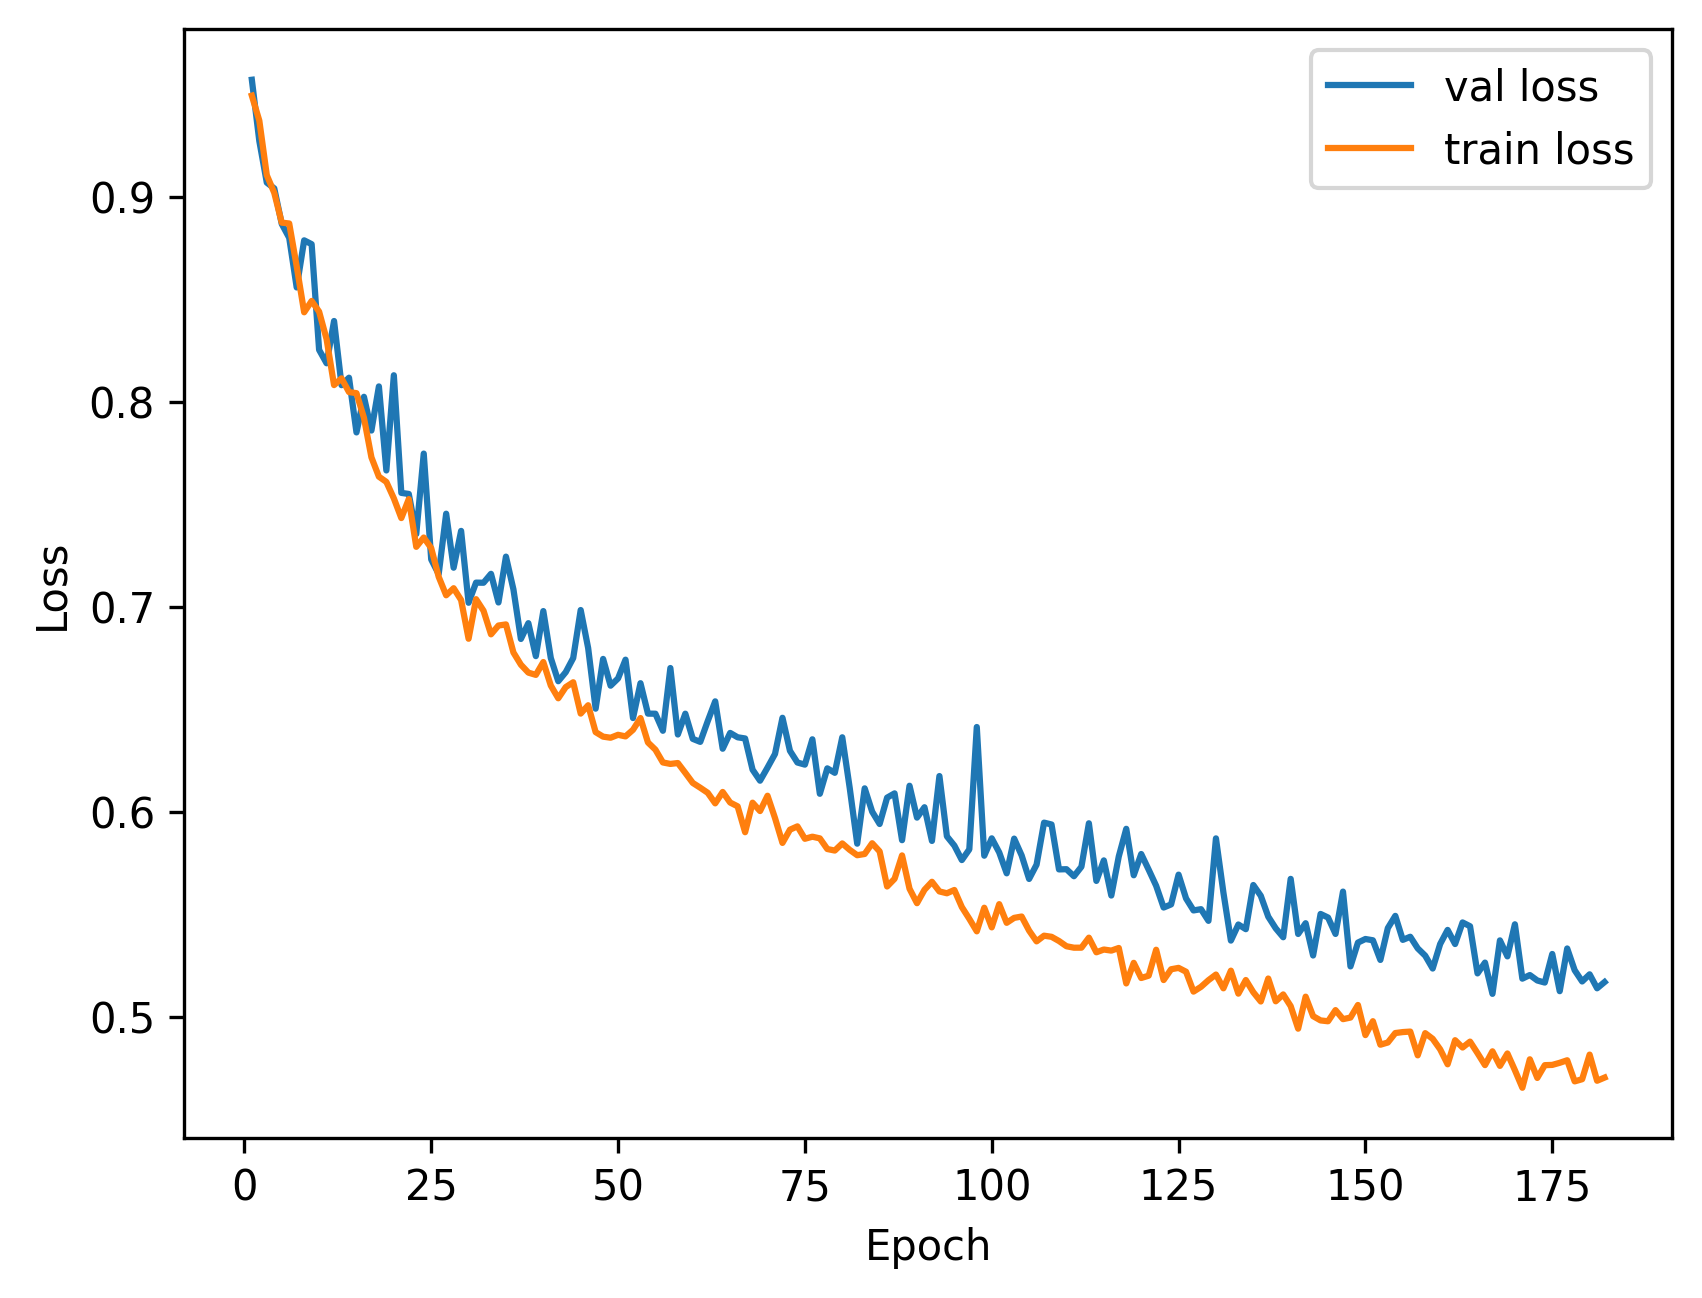

In [20]:
m1_log=pd.read_csv('1_training_log20251120_020242.csv')
plt.figure(dpi=300)
plt.plot(m1_log['epoch'], m1_log['val_loss'],label='val loss')
plt.plot(m1_log['epoch'], m1_log['train_loss'],label='train loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')

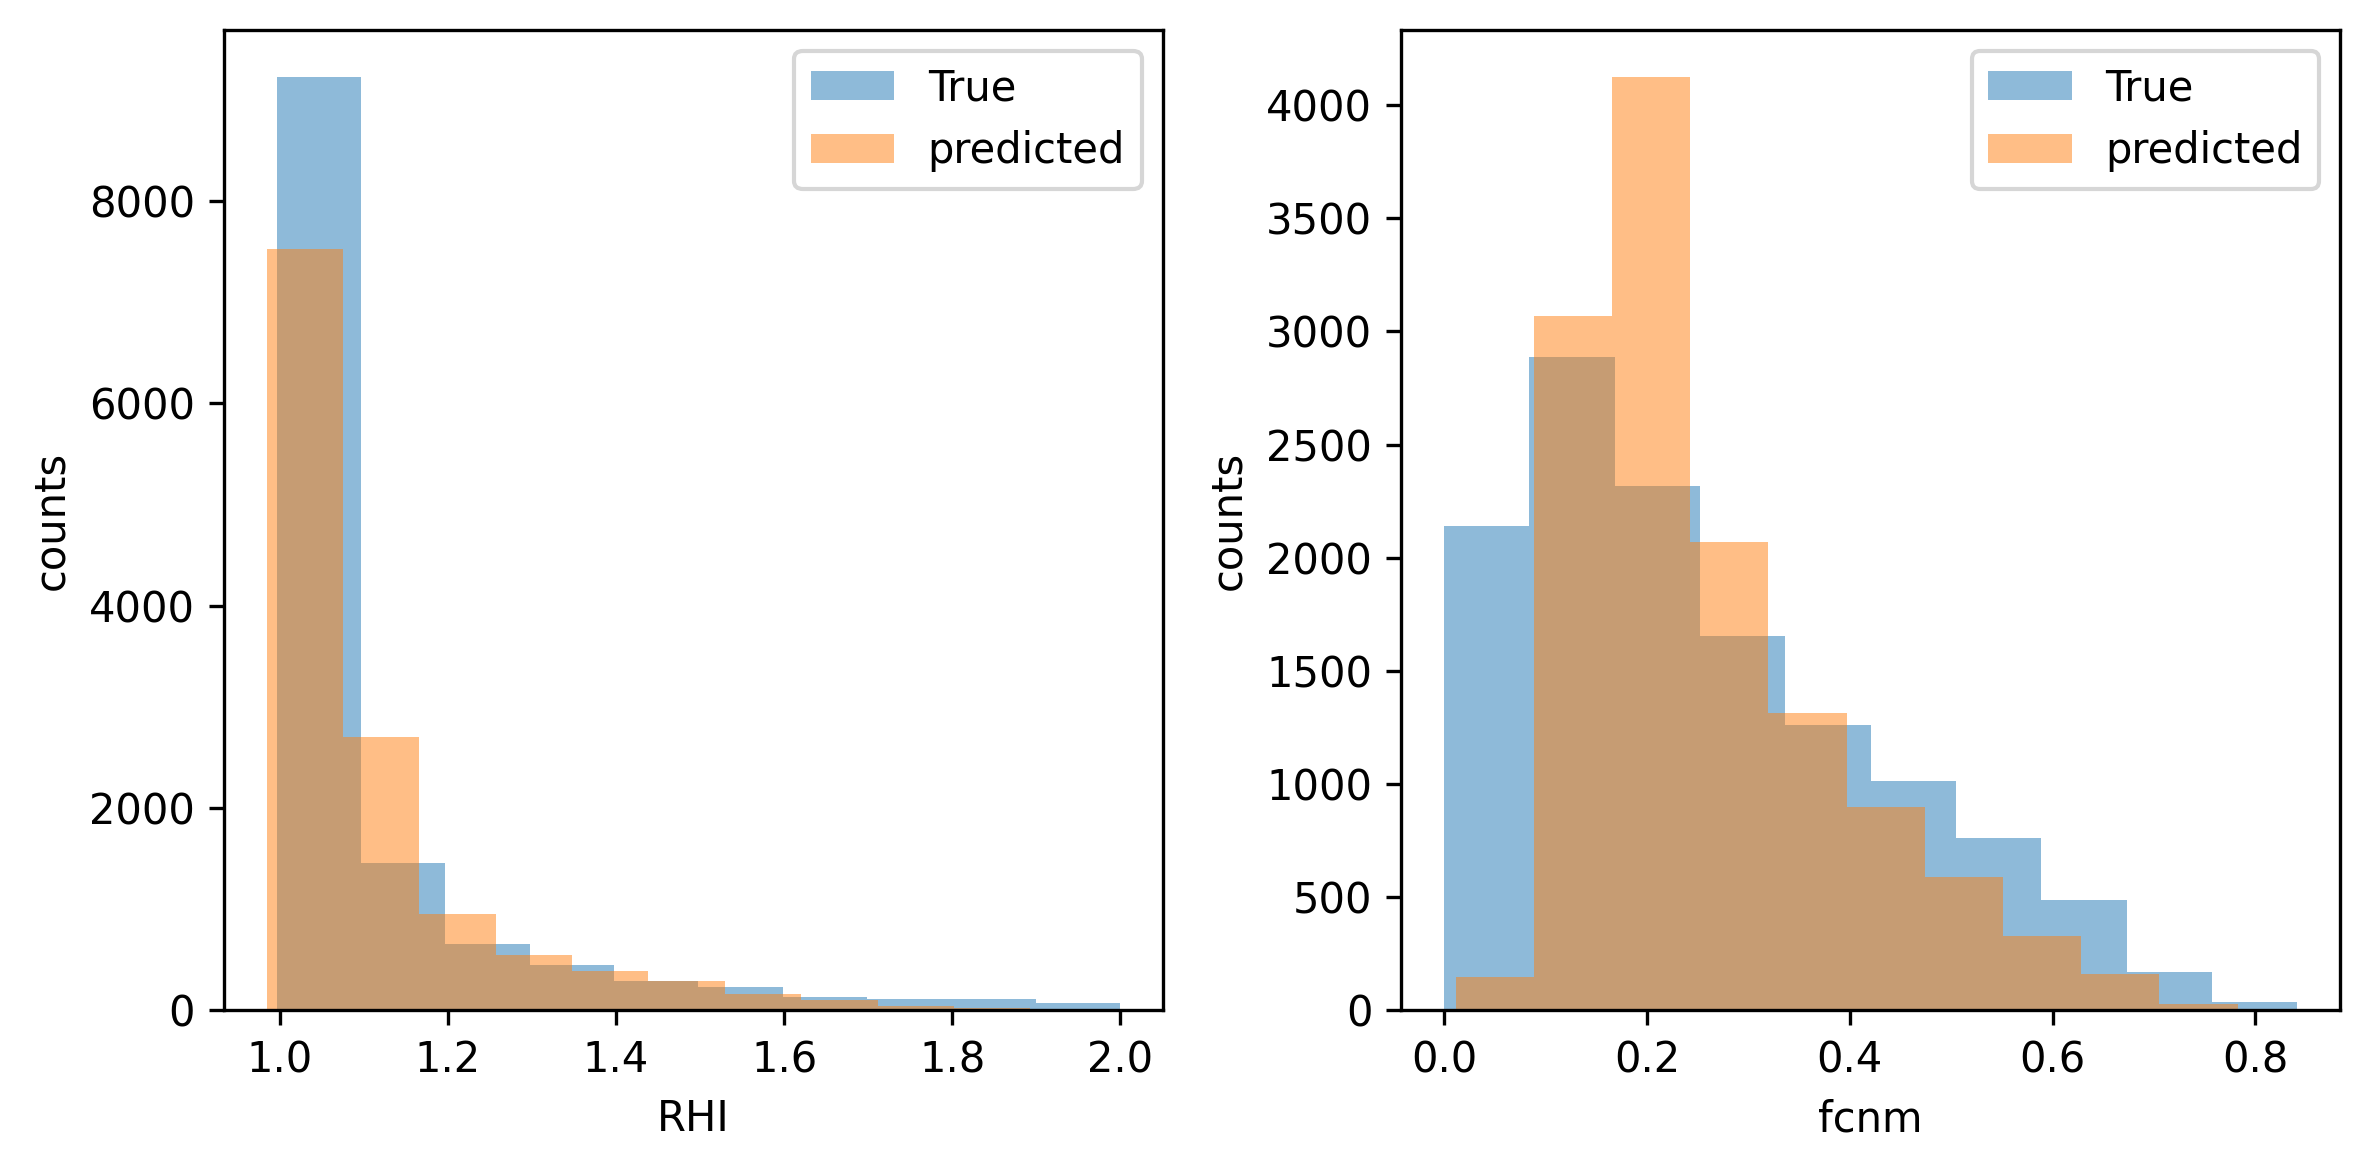

In [7]:
m1=pd.read_csv('1_test_predictions20251120_020242.csv')
plt.figure(figsize=(8,4),dpi=300)
plt.subplot(121)
plt.hist(m1['RHI_true'],alpha=0.5,label='True')
plt.hist(m1['RHI_pred'],alpha=0.5,label='predicted')
plt.xlabel(f"RHI")
plt.ylabel(f"counts")
plt.legend()


plt.subplot(122)
plt.hist(m1['fcnm_true'],alpha=0.5,label='True')
plt.hist(m1['fcnm_pred'],alpha=0.5,label='predicted')
plt.xlabel(f"fcnm")
plt.ylabel(f"counts")
plt.legend()
plt.tight_layout()

## model 2

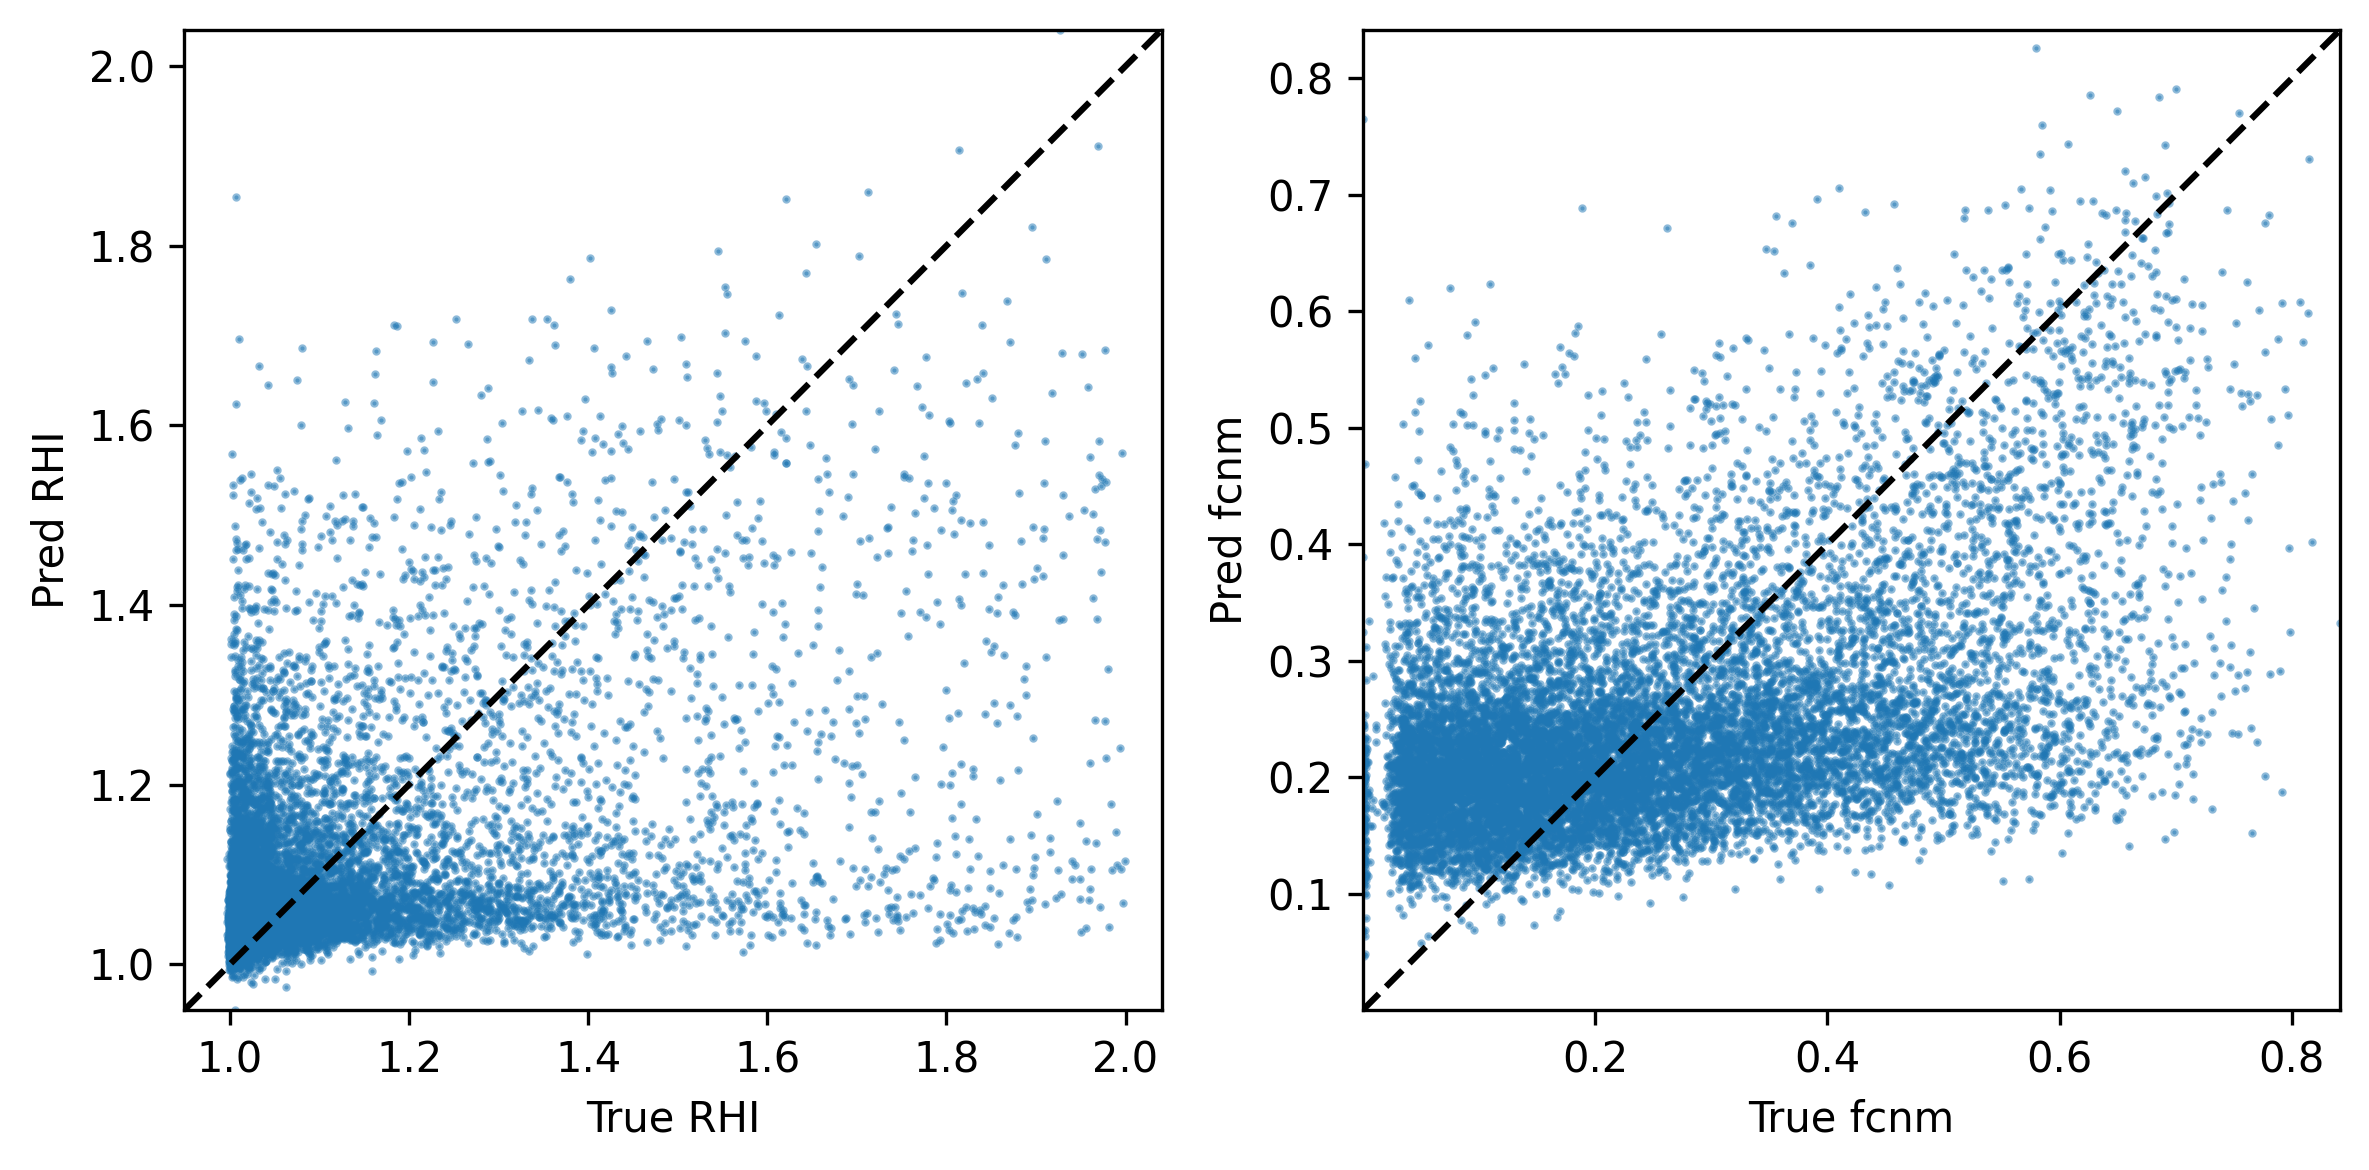

In [3]:
m1=pd.read_csv('2_test_predictions20251120_183205.csv')
plt.figure(figsize=(8,4),dpi=300)
plt.subplot(121)
plt.scatter(m1['RHI_true'],m1['RHI_pred'],s=1,alpha=0.5)
lo, hi = float(min(m1['RHI_true'].min(), m1['RHI_pred'].min())), float(max(m1['RHI_true'].max(), m1['RHI_pred'].max()))
plt.plot([lo, hi], [lo, hi],'k--')
plt.xlabel(f"True RHI")
plt.ylabel(f"Pred RHI")
plt.xlim(lo, hi)
plt.ylim(lo, hi)

plt.subplot(122)
plt.scatter(m1['fcnm_true'],m1['fcnm_pred'],s=1,alpha=0.5)
lo, hi = float(min(m1['fcnm_true'].min(), m1['fcnm_pred'].min())), float(max(m1['fcnm_true'].max(), m1['fcnm_pred'].max()))
plt.plot([lo, hi], [lo, hi],'k--')
plt.xlabel(f"True fcnm")
plt.ylabel(f"Pred fcnm")
plt.xlim(lo, hi)
plt.ylim(lo, hi)
plt.tight_layout()

Text(0, 0.5, 'Loss')

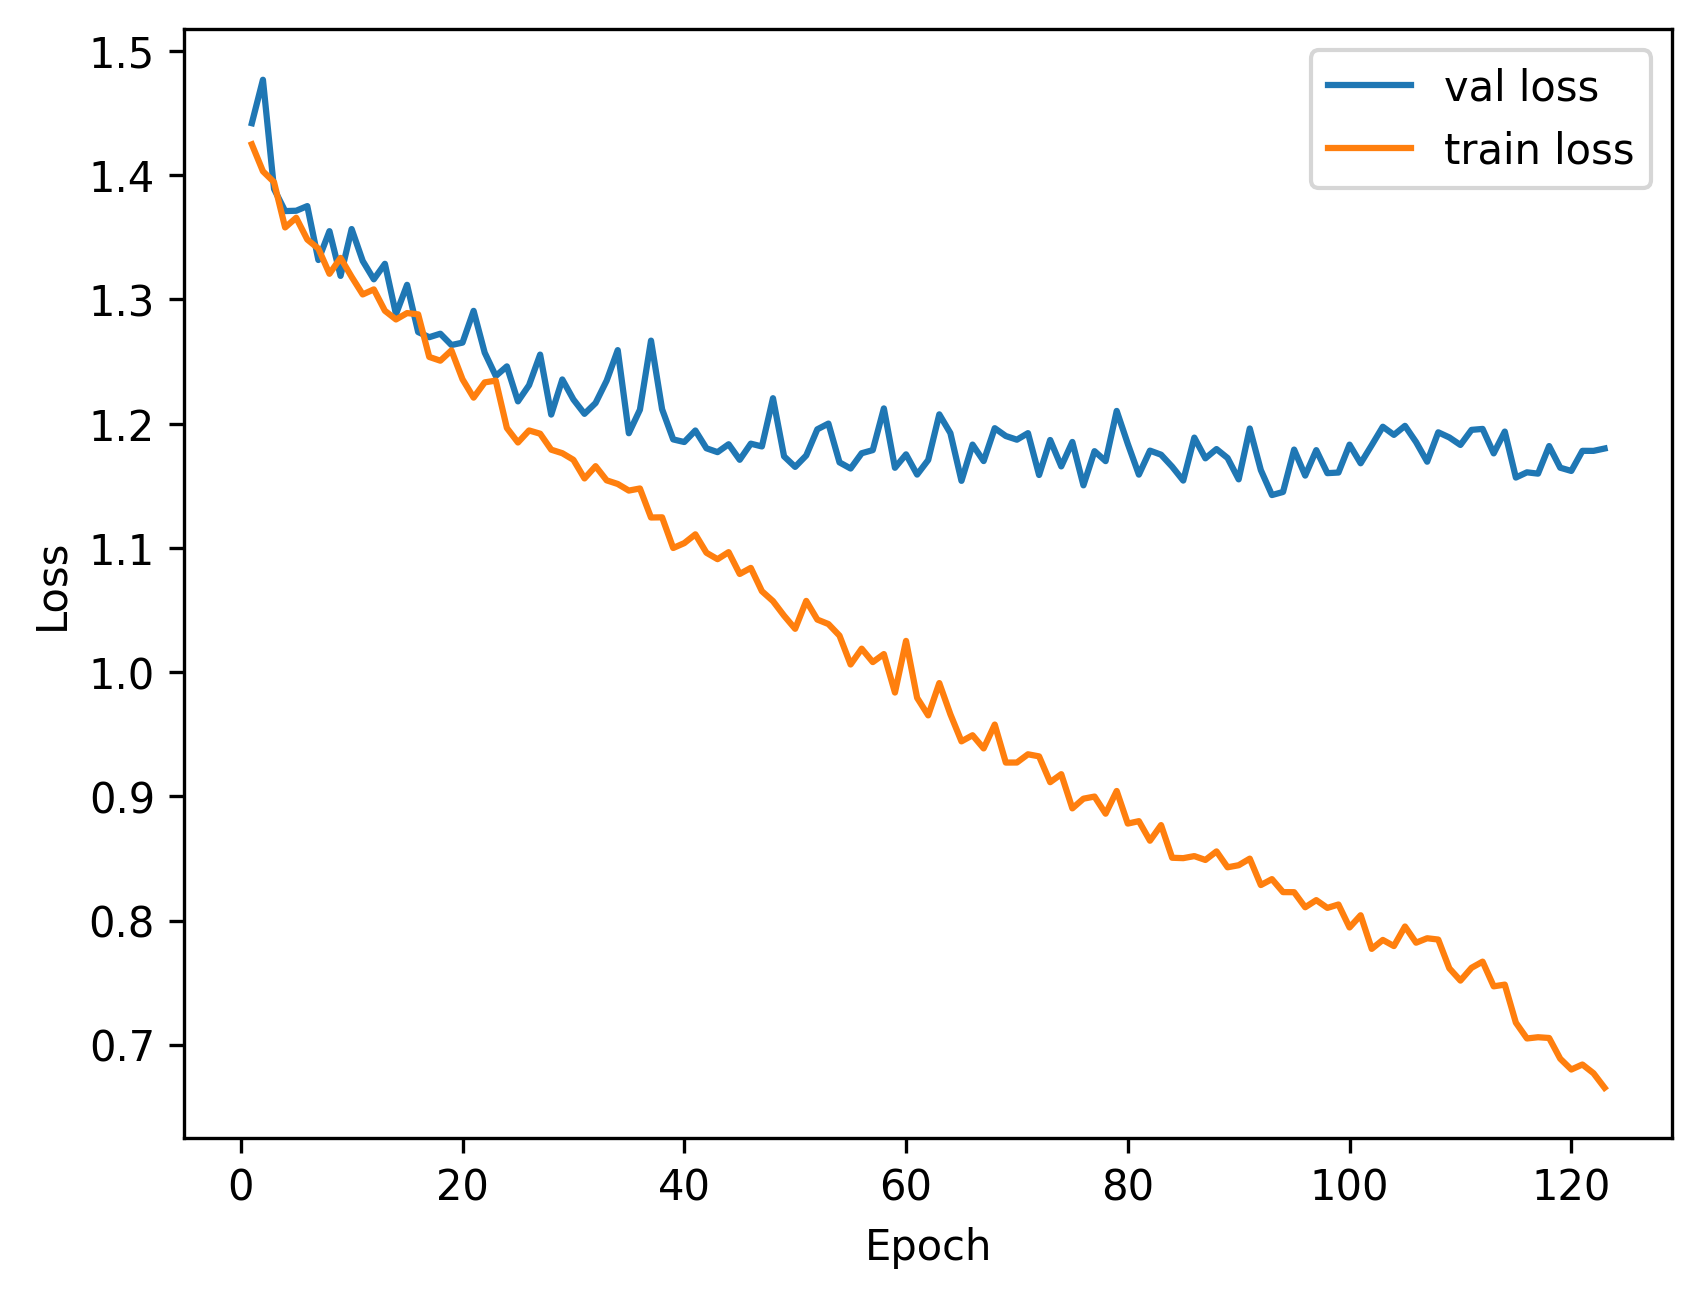

In [4]:
m1_log=pd.read_csv('2_training_log20251120_183205.csv')
plt.figure(dpi=300)
plt.plot(m1_log['epoch'], m1_log['val_loss'],label='val loss')
plt.plot(m1_log['epoch'], m1_log['train_loss'],label='train loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')

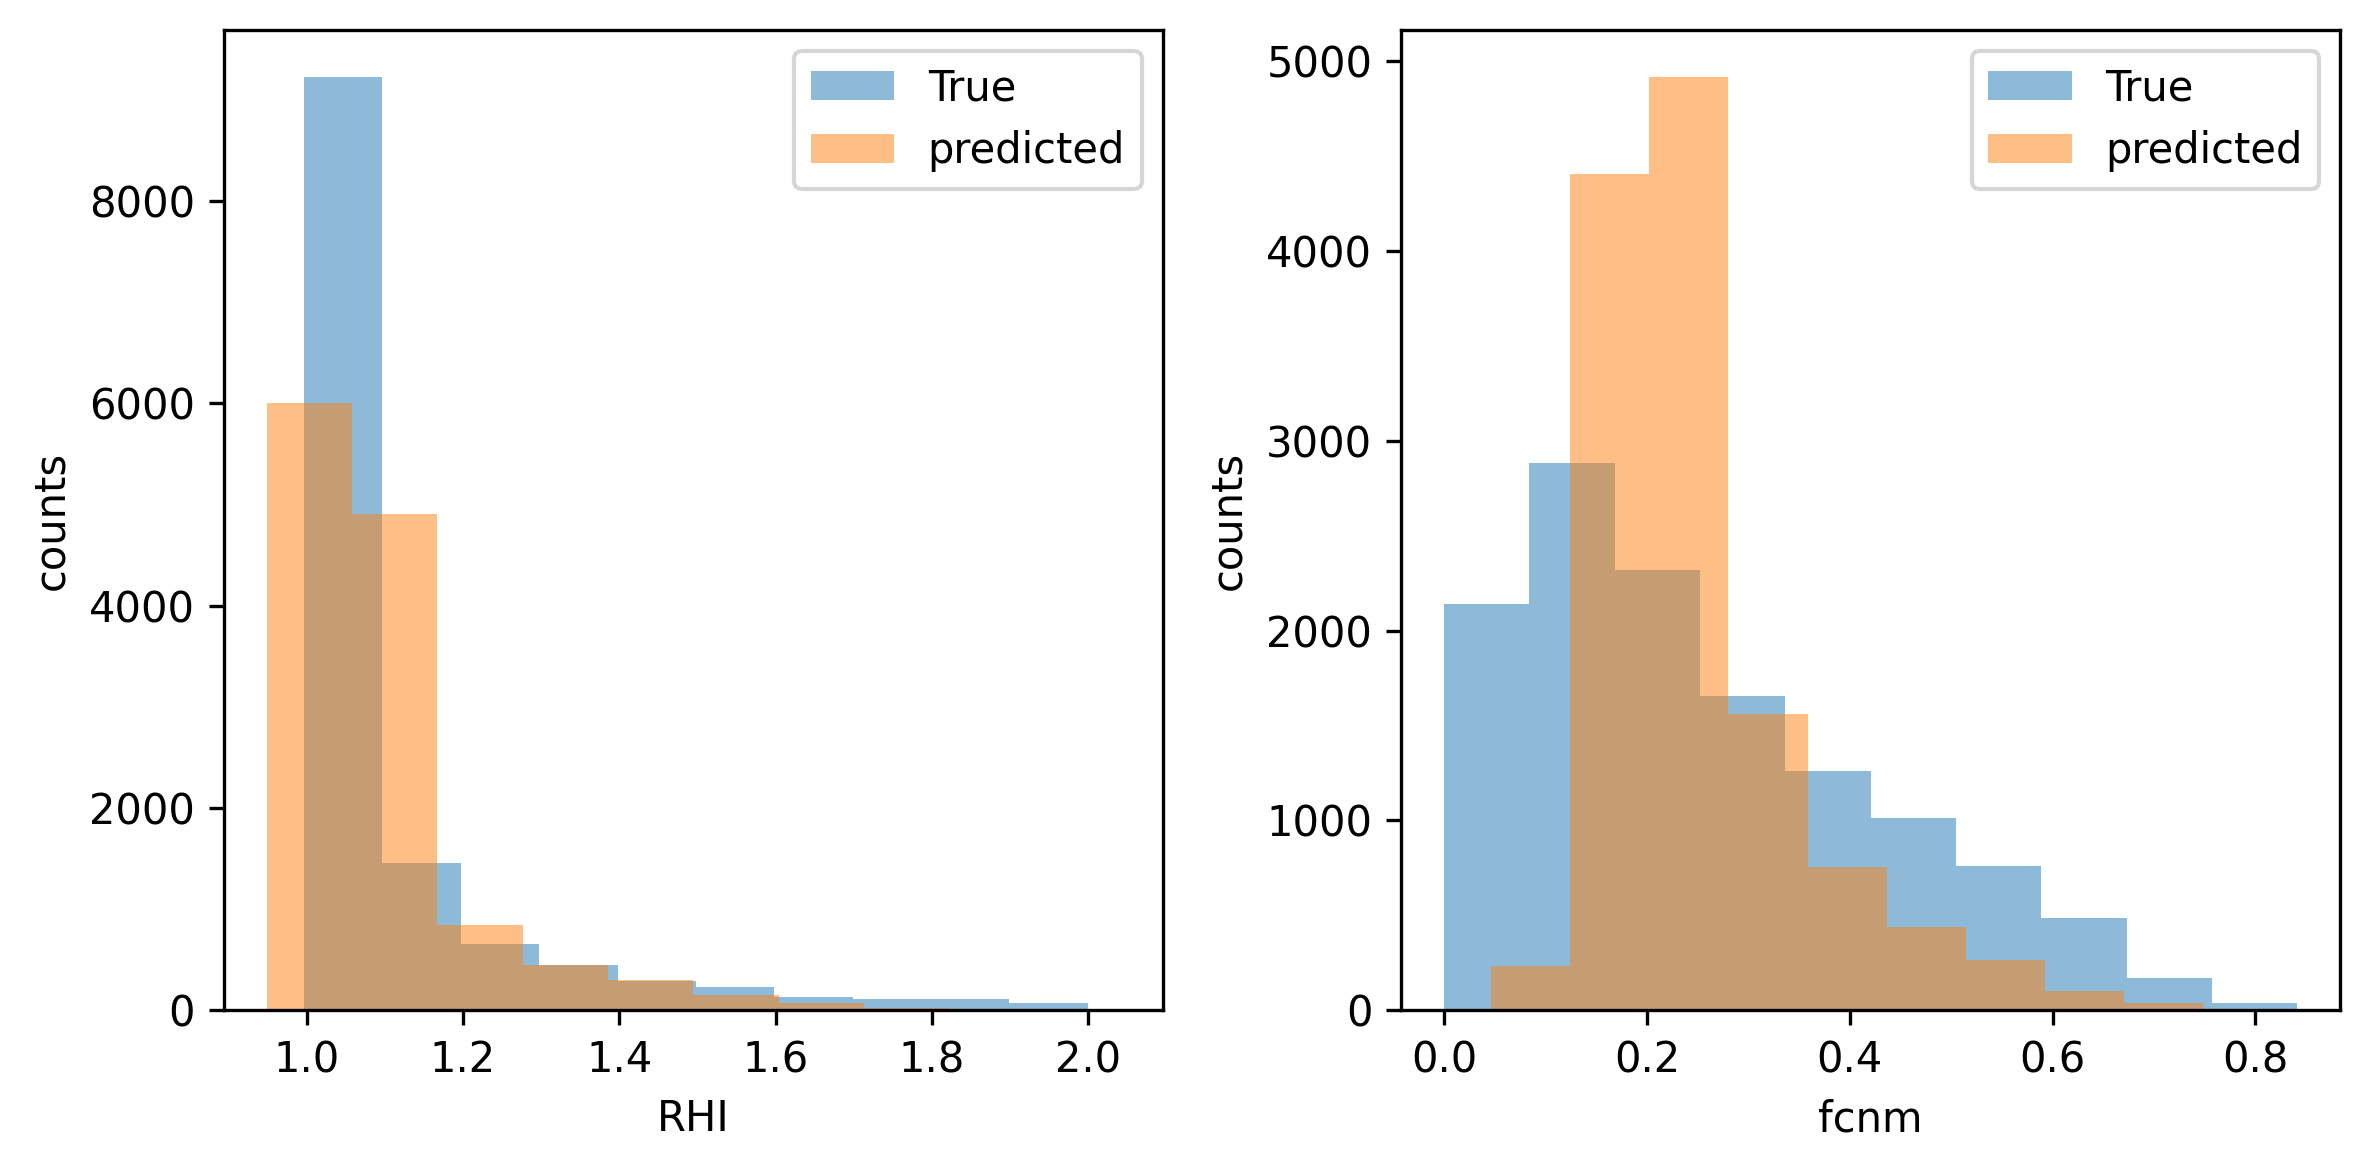

In [8]:
m1=pd.read_csv('2_test_predictions20251120_183205.csv')
plt.figure(figsize=(8,4),dpi=300)
plt.subplot(121)
plt.hist(m1['RHI_true'],alpha=0.5,label='True')
plt.hist(m1['RHI_pred'],alpha=0.5,label='predicted')
plt.xlabel(f"RHI")
plt.ylabel(f"counts")
plt.legend()


plt.subplot(122)
plt.hist(m1['fcnm_true'],alpha=0.5,label='True')
plt.hist(m1['fcnm_pred'],alpha=0.5,label='predicted')
plt.xlabel(f"fcnm")
plt.ylabel(f"counts")
plt.legend()
plt.tight_layout()

## model 3

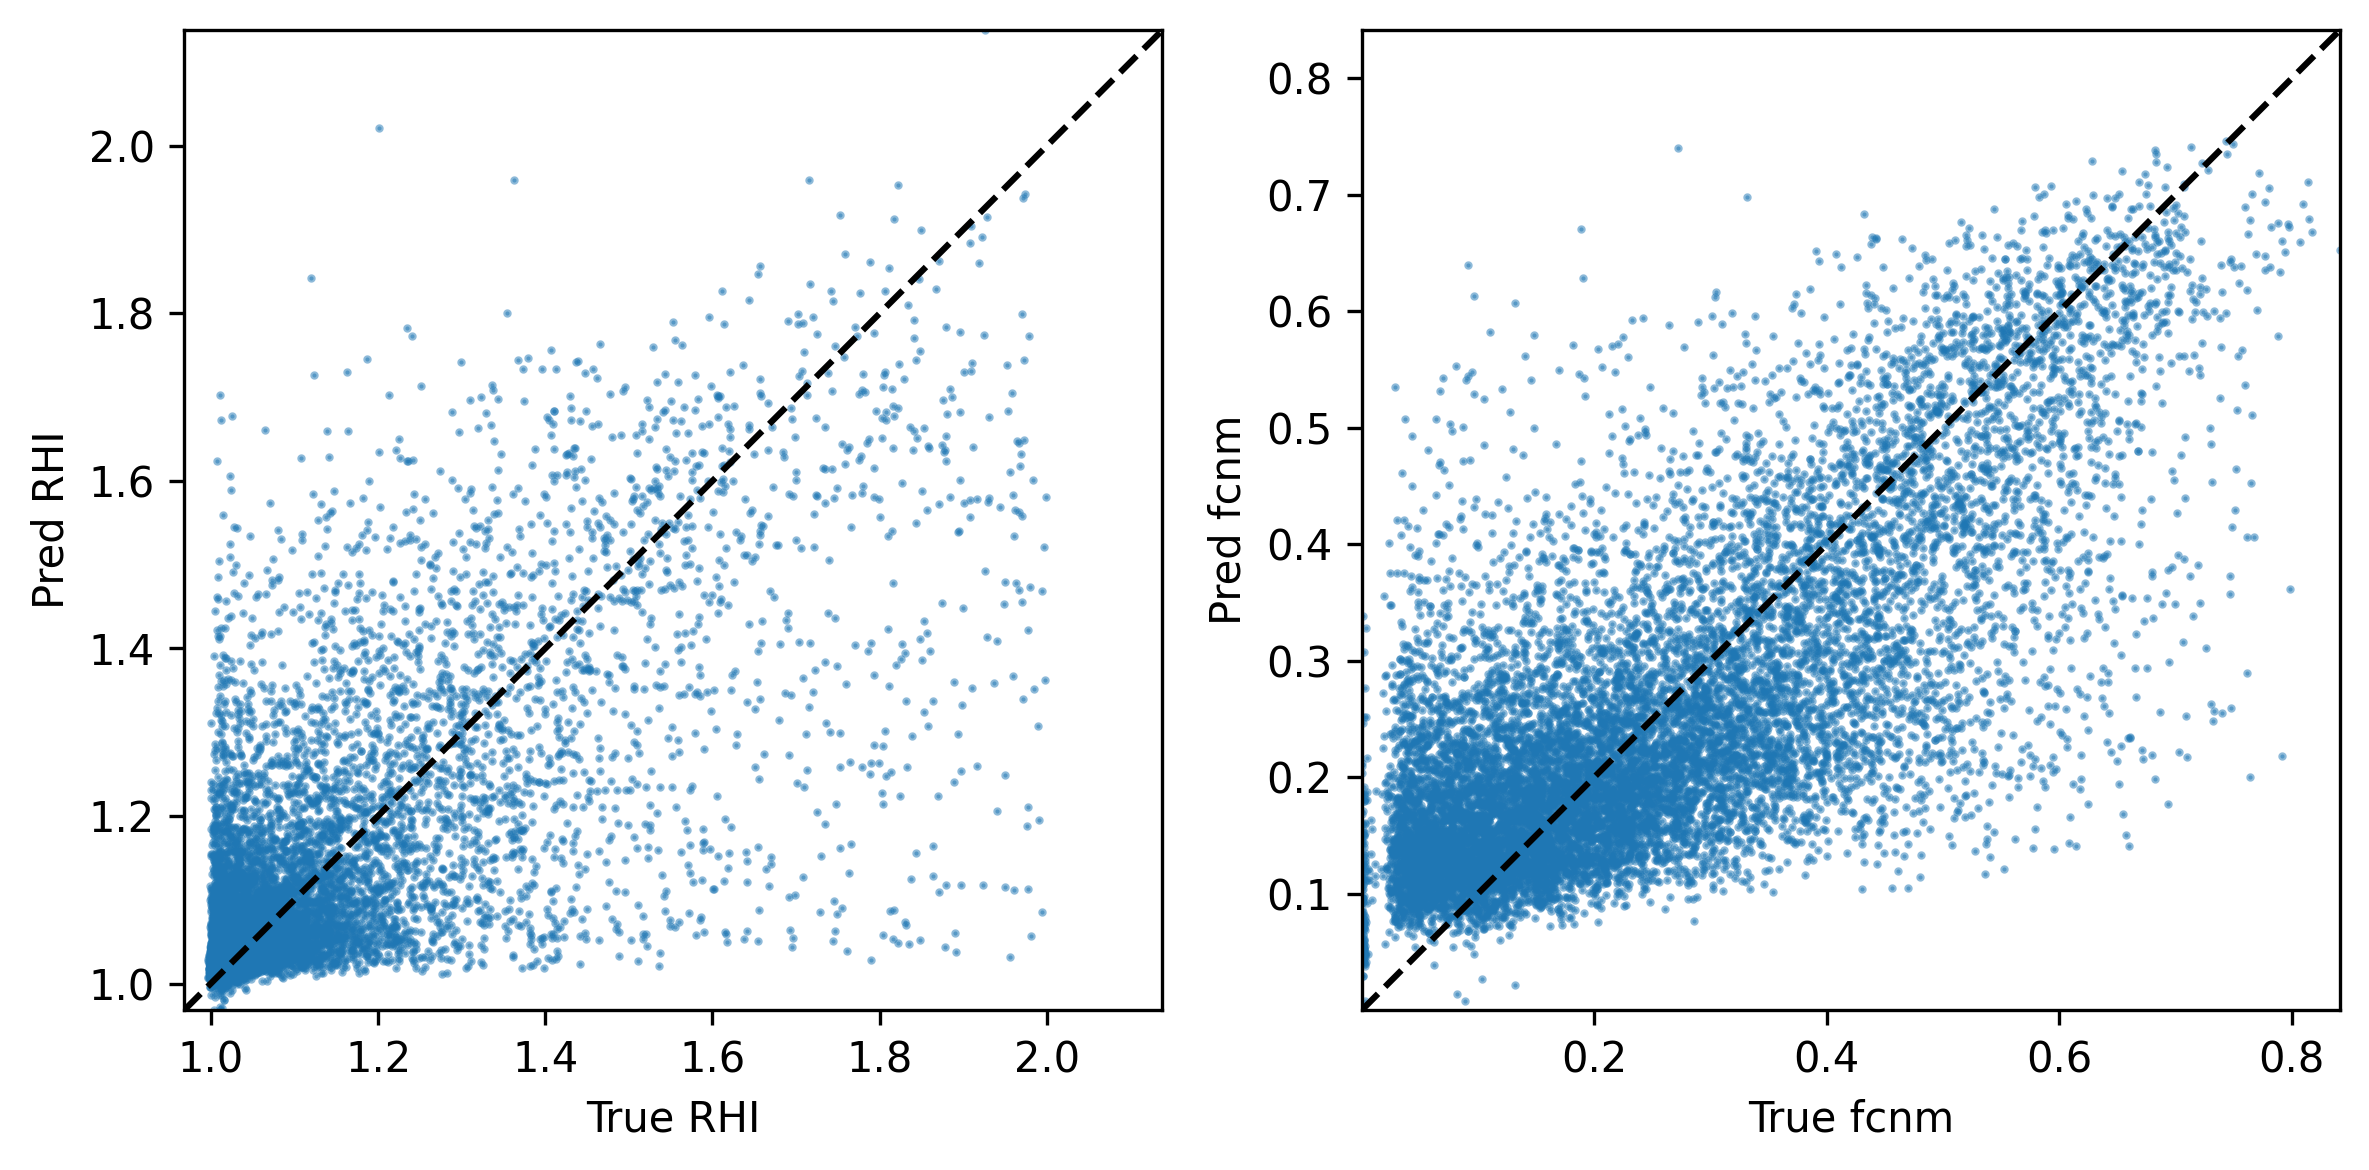

In [23]:
m1=pd.read_csv('3_test_predictions20251120_025045.csv')
plt.figure(figsize=(8,4),dpi=300)
plt.subplot(121)
plt.scatter(m1['RHI_true'],m1['RHI_pred'],s=1,alpha=0.5)
lo, hi = float(min(m1['RHI_true'].min(), m1['RHI_pred'].min())), float(max(m1['RHI_true'].max(), m1['RHI_pred'].max()))
plt.plot([lo, hi], [lo, hi],'k--')
plt.xlabel(f"True RHI")
plt.ylabel(f"Pred RHI")
plt.xlim(lo, hi)
plt.ylim(lo, hi)

plt.subplot(122)
plt.scatter(m1['fcnm_true'],m1['fcnm_pred'],s=1,alpha=0.5)
lo, hi = float(min(m1['fcnm_true'].min(), m1['fcnm_pred'].min())), float(max(m1['fcnm_true'].max(), m1['fcnm_pred'].max()))
plt.plot([lo, hi], [lo, hi],'k--')
plt.xlabel(f"True fcnm")
plt.ylabel(f"Pred fcnm")
plt.xlim(lo, hi)
plt.ylim(lo, hi)
plt.tight_layout()

Text(0, 0.5, 'Loss')

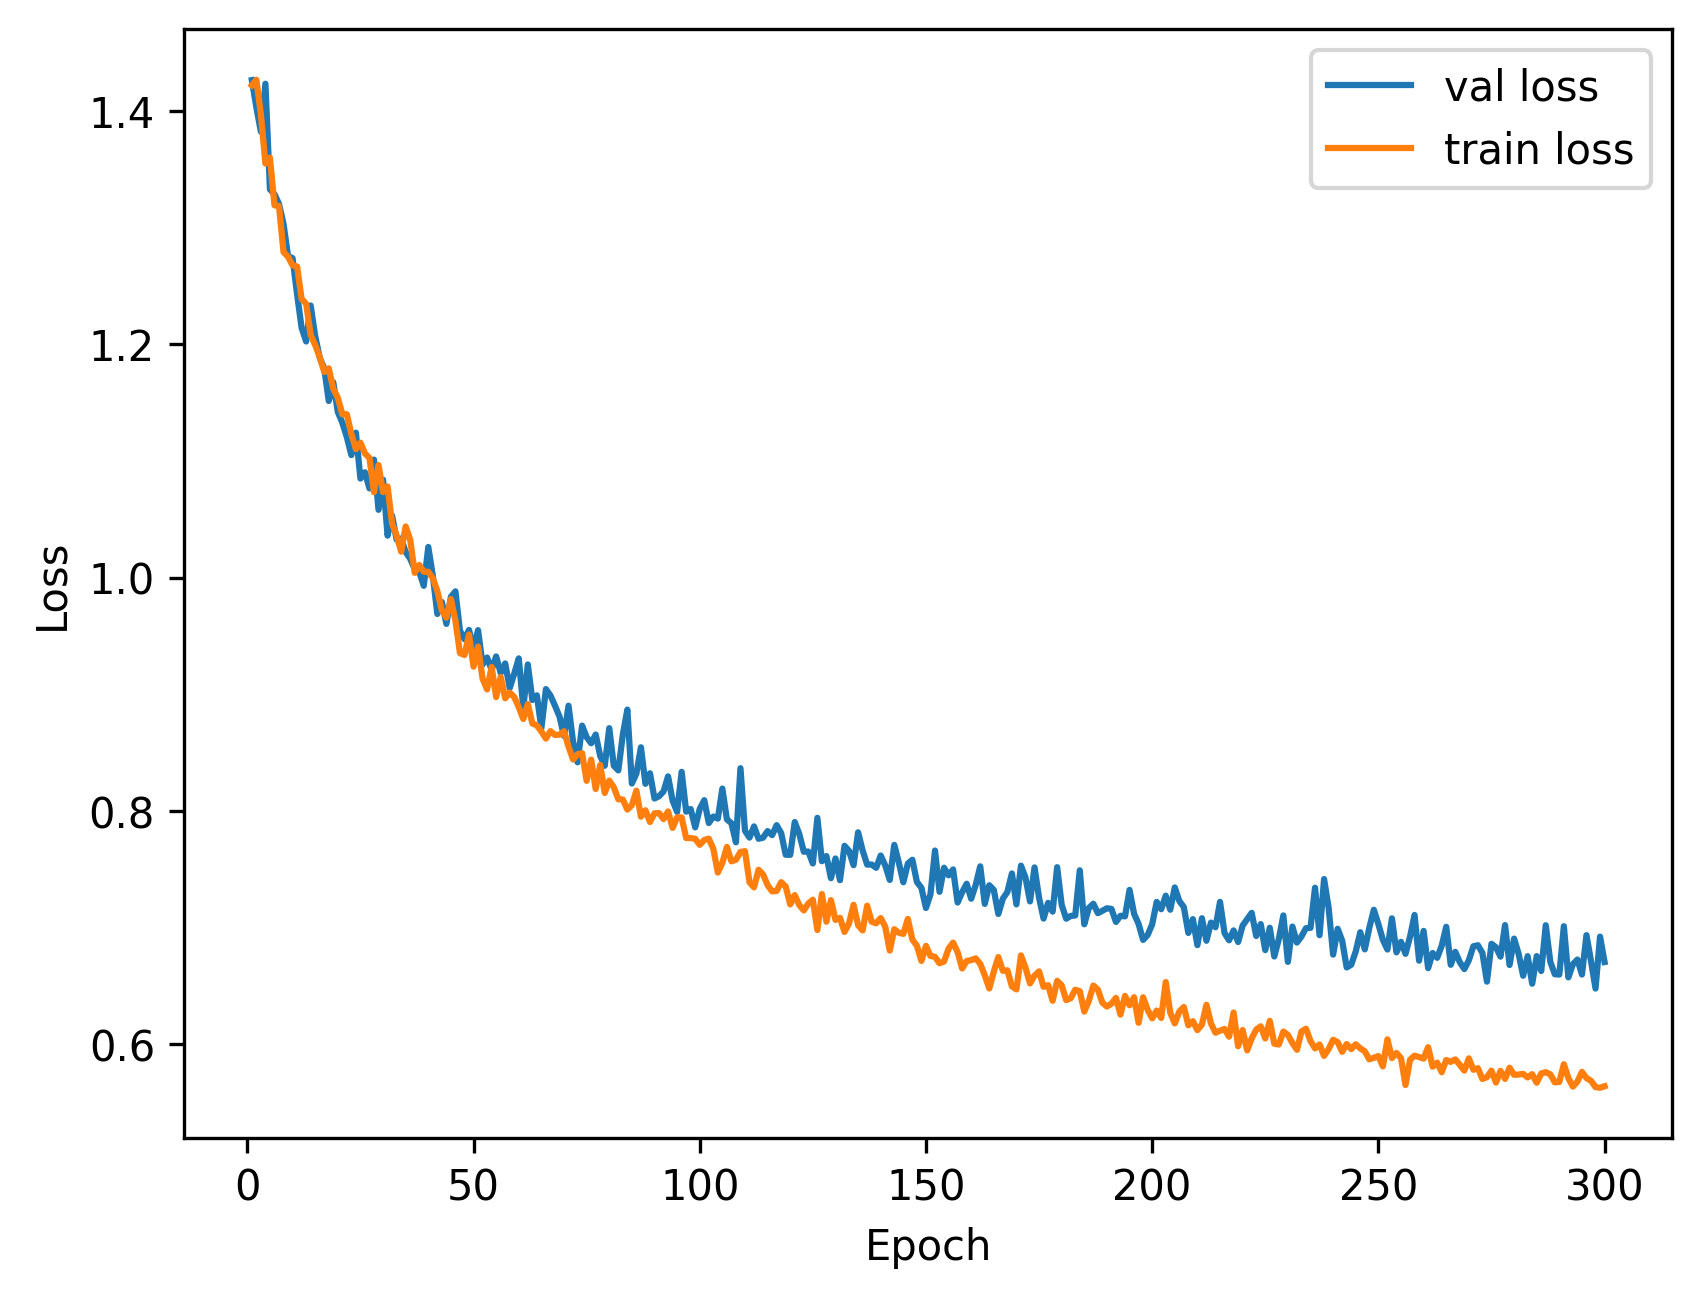

In [24]:
m1_log=pd.read_csv('3_training_log20251120_025045.csv')
plt.figure(dpi=300)
plt.plot(m1_log['epoch'], m1_log['val_loss'],label='val loss')
plt.plot(m1_log['epoch'], m1_log['train_loss'],label='train loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')

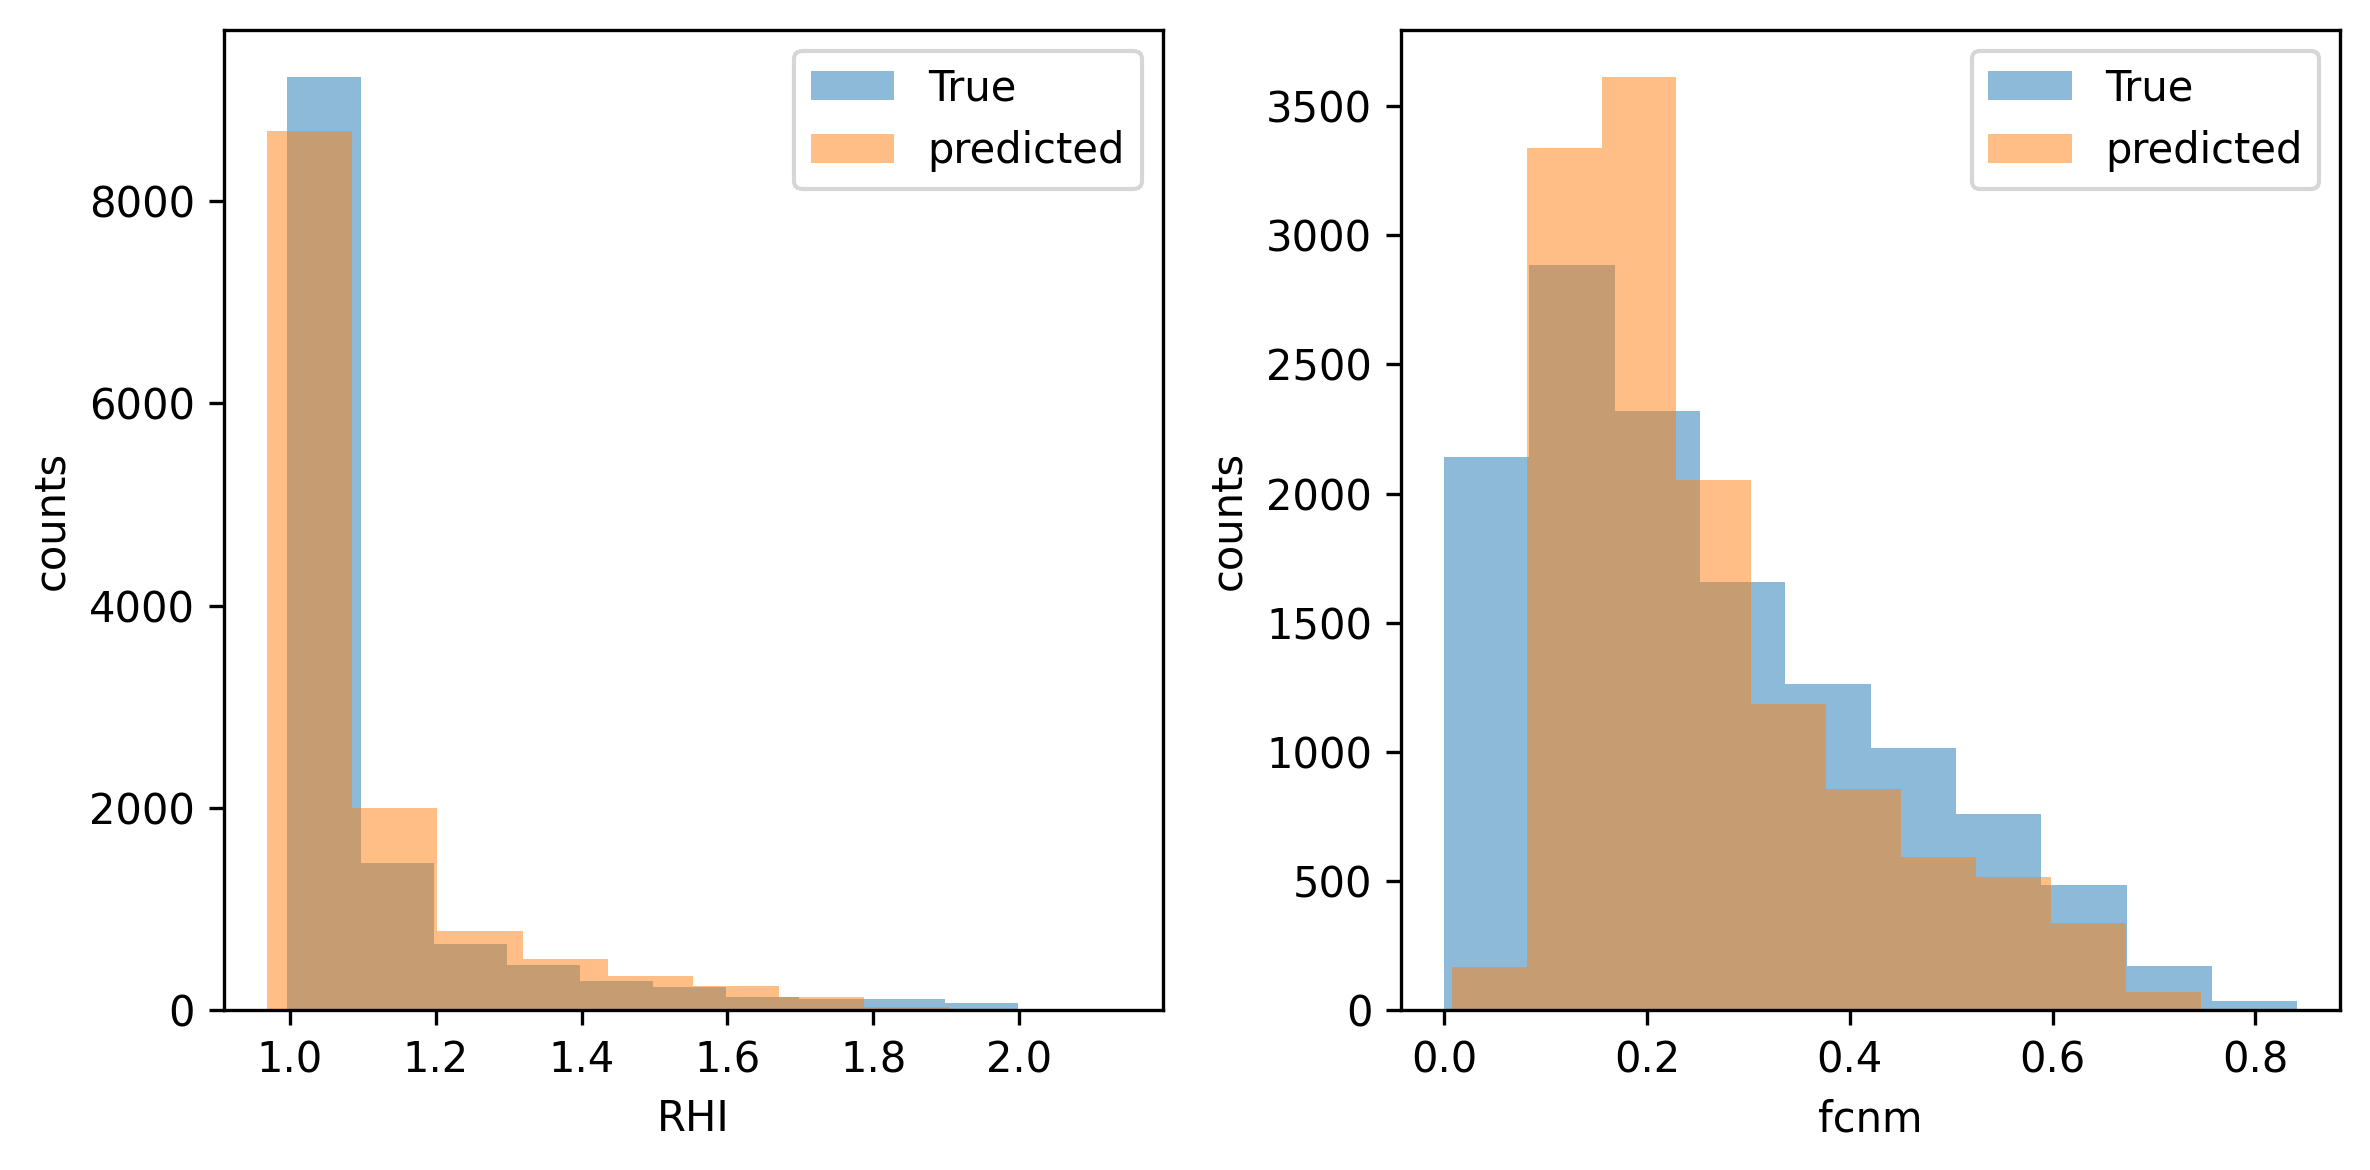

In [9]:
m1=pd.read_csv('3_test_predictions20251120_025045.csv')
plt.figure(figsize=(8,4),dpi=300)
plt.subplot(121)
plt.hist(m1['RHI_true'],alpha=0.5,label='True')
plt.hist(m1['RHI_pred'],alpha=0.5,label='predicted')
plt.xlabel(f"RHI")
plt.ylabel(f"counts")
plt.legend()


plt.subplot(122)
plt.hist(m1['fcnm_true'],alpha=0.5,label='True')
plt.hist(m1['fcnm_pred'],alpha=0.5,label='predicted')
plt.xlabel(f"fcnm")
plt.ylabel(f"counts")
plt.legend()
plt.tight_layout()

## model 4

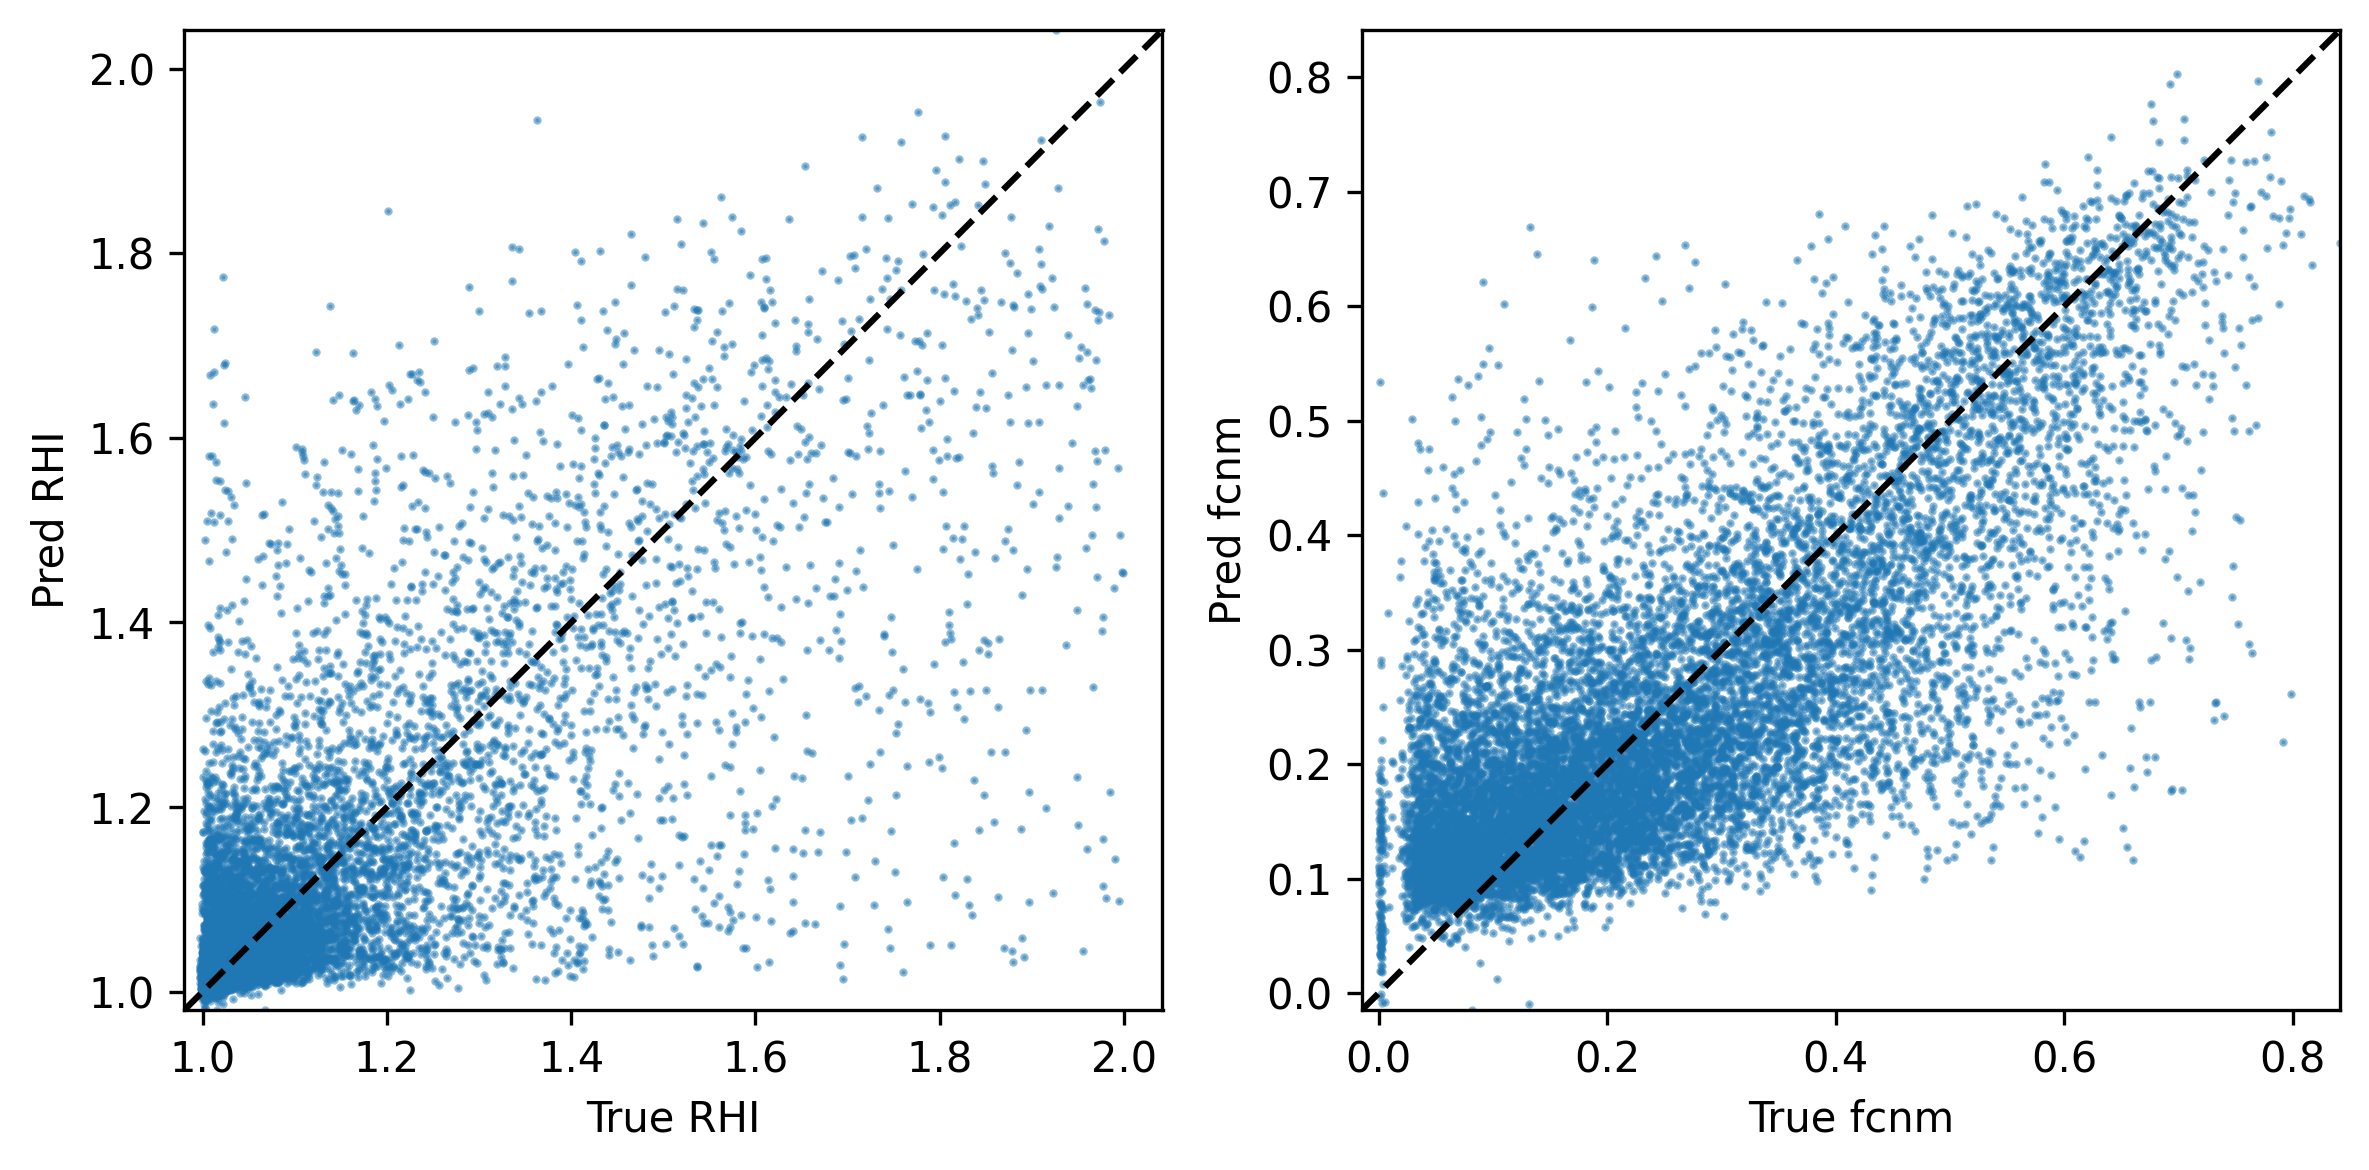

In [38]:
m1=pd.read_csv('4_test_predictions20251120_172637.csv')
plt.figure(figsize=(8,4),dpi=300)
plt.subplot(121)
plt.scatter(m1['RHI_true'],m1['RHI_pred'],s=1,alpha=0.5)
lo, hi = float(min(m1['RHI_true'].min(), m1['RHI_pred'].min())), float(max(m1['RHI_true'].max(), m1['RHI_pred'].max()))
plt.plot([lo, hi], [lo, hi],'k--')
plt.xlabel(f"True RHI")
plt.ylabel(f"Pred RHI")
plt.xlim(lo, hi)
plt.ylim(lo, hi)

plt.subplot(122)
plt.scatter(m1['fcnm_true'],m1['fcnm_pred'],s=1,alpha=0.5)
lo, hi = float(min(m1['fcnm_true'].min(), m1['fcnm_pred'].min())), float(max(m1['fcnm_true'].max(), m1['fcnm_pred'].max()))
plt.plot([lo, hi], [lo, hi],'k--')
plt.xlabel(f"True fcnm")
plt.ylabel(f"Pred fcnm")
plt.xlim(lo, hi)
plt.ylim(lo, hi)
plt.tight_layout()

Text(0, 0.5, 'Loss')

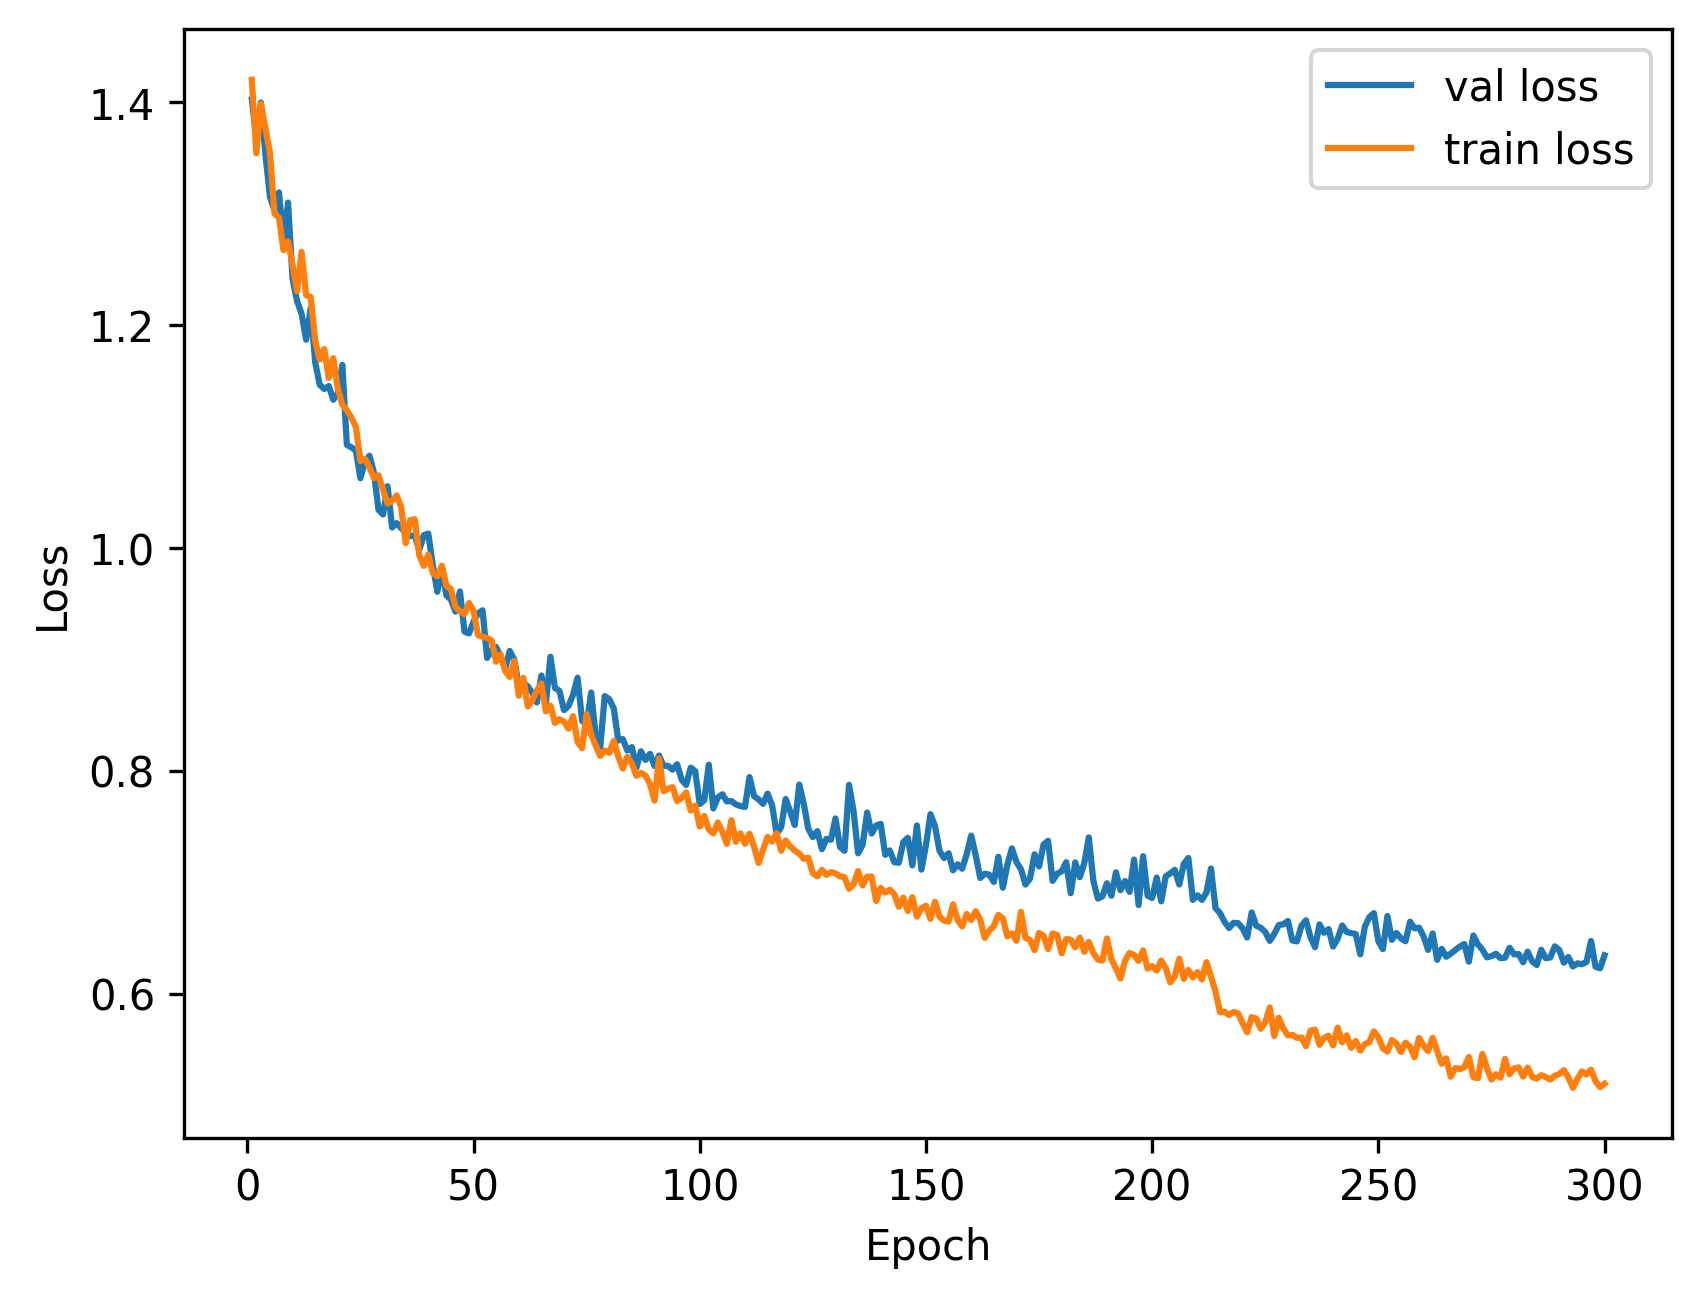

In [39]:
m1_log=pd.read_csv('4_training_log20251120_172637.csv')
plt.figure(dpi=300)
plt.plot(m1_log['epoch'], m1_log['val_loss'],label='val loss')
plt.plot(m1_log['epoch'], m1_log['train_loss'],label='train loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')

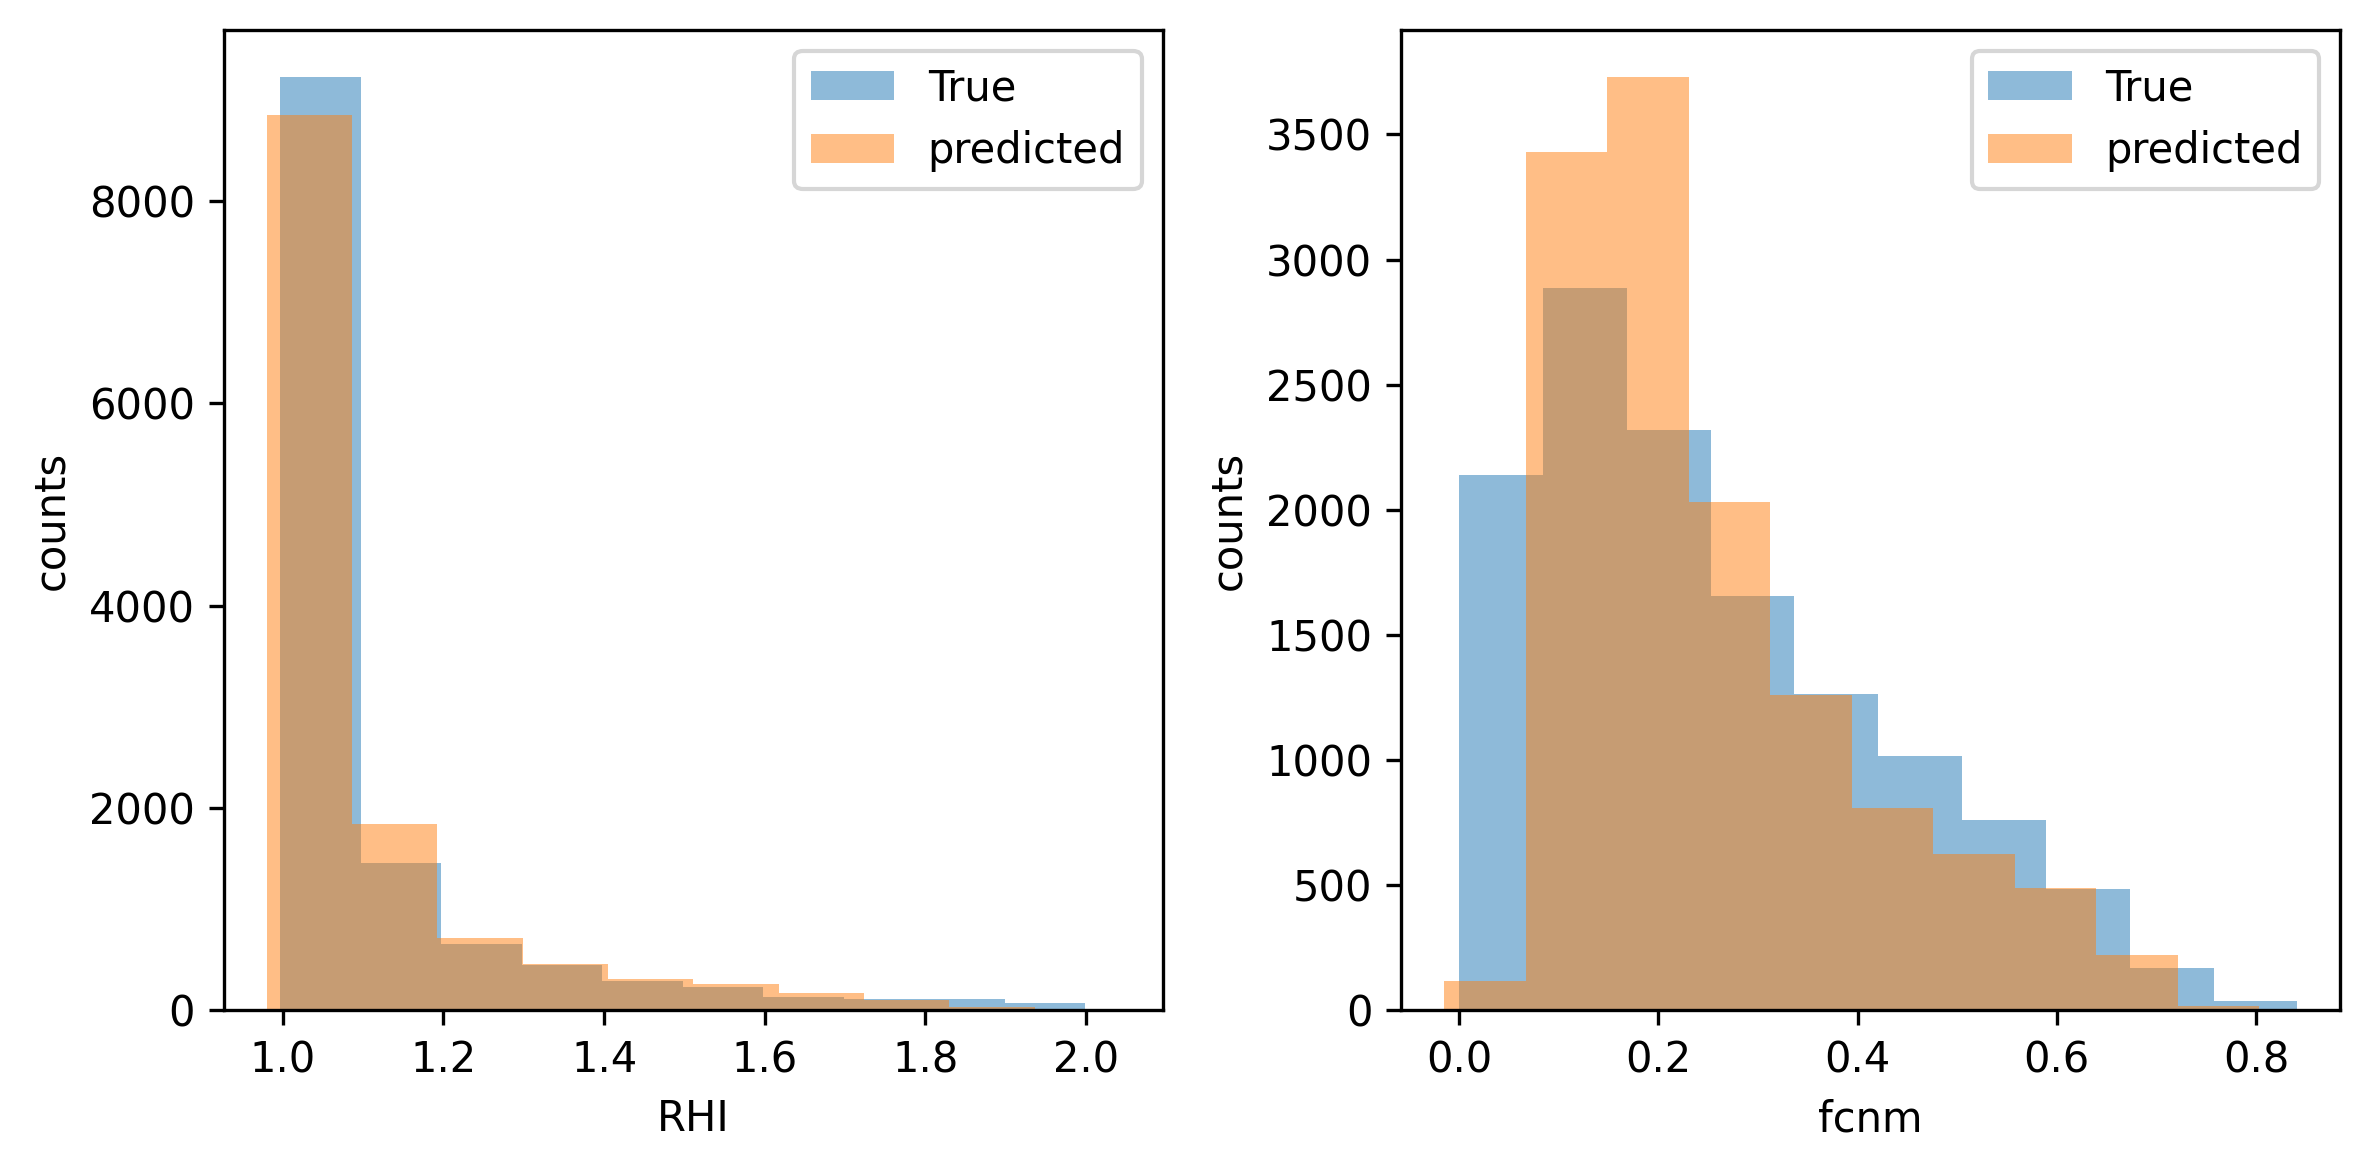

In [10]:
m1=pd.read_csv('4_test_predictions20251120_172637.csv')
plt.figure(figsize=(8,4),dpi=300)
plt.subplot(121)
plt.hist(m1['RHI_true'],alpha=0.5,label='True')
plt.hist(m1['RHI_pred'],alpha=0.5,label='predicted')
plt.xlabel(f"RHI")
plt.ylabel(f"counts")
plt.legend()


plt.subplot(122)
plt.hist(m1['fcnm_true'],alpha=0.5,label='True')
plt.hist(m1['fcnm_pred'],alpha=0.5,label='predicted')
plt.xlabel(f"fcnm")
plt.ylabel(f"counts")
plt.legend()
plt.tight_layout()

## model 5

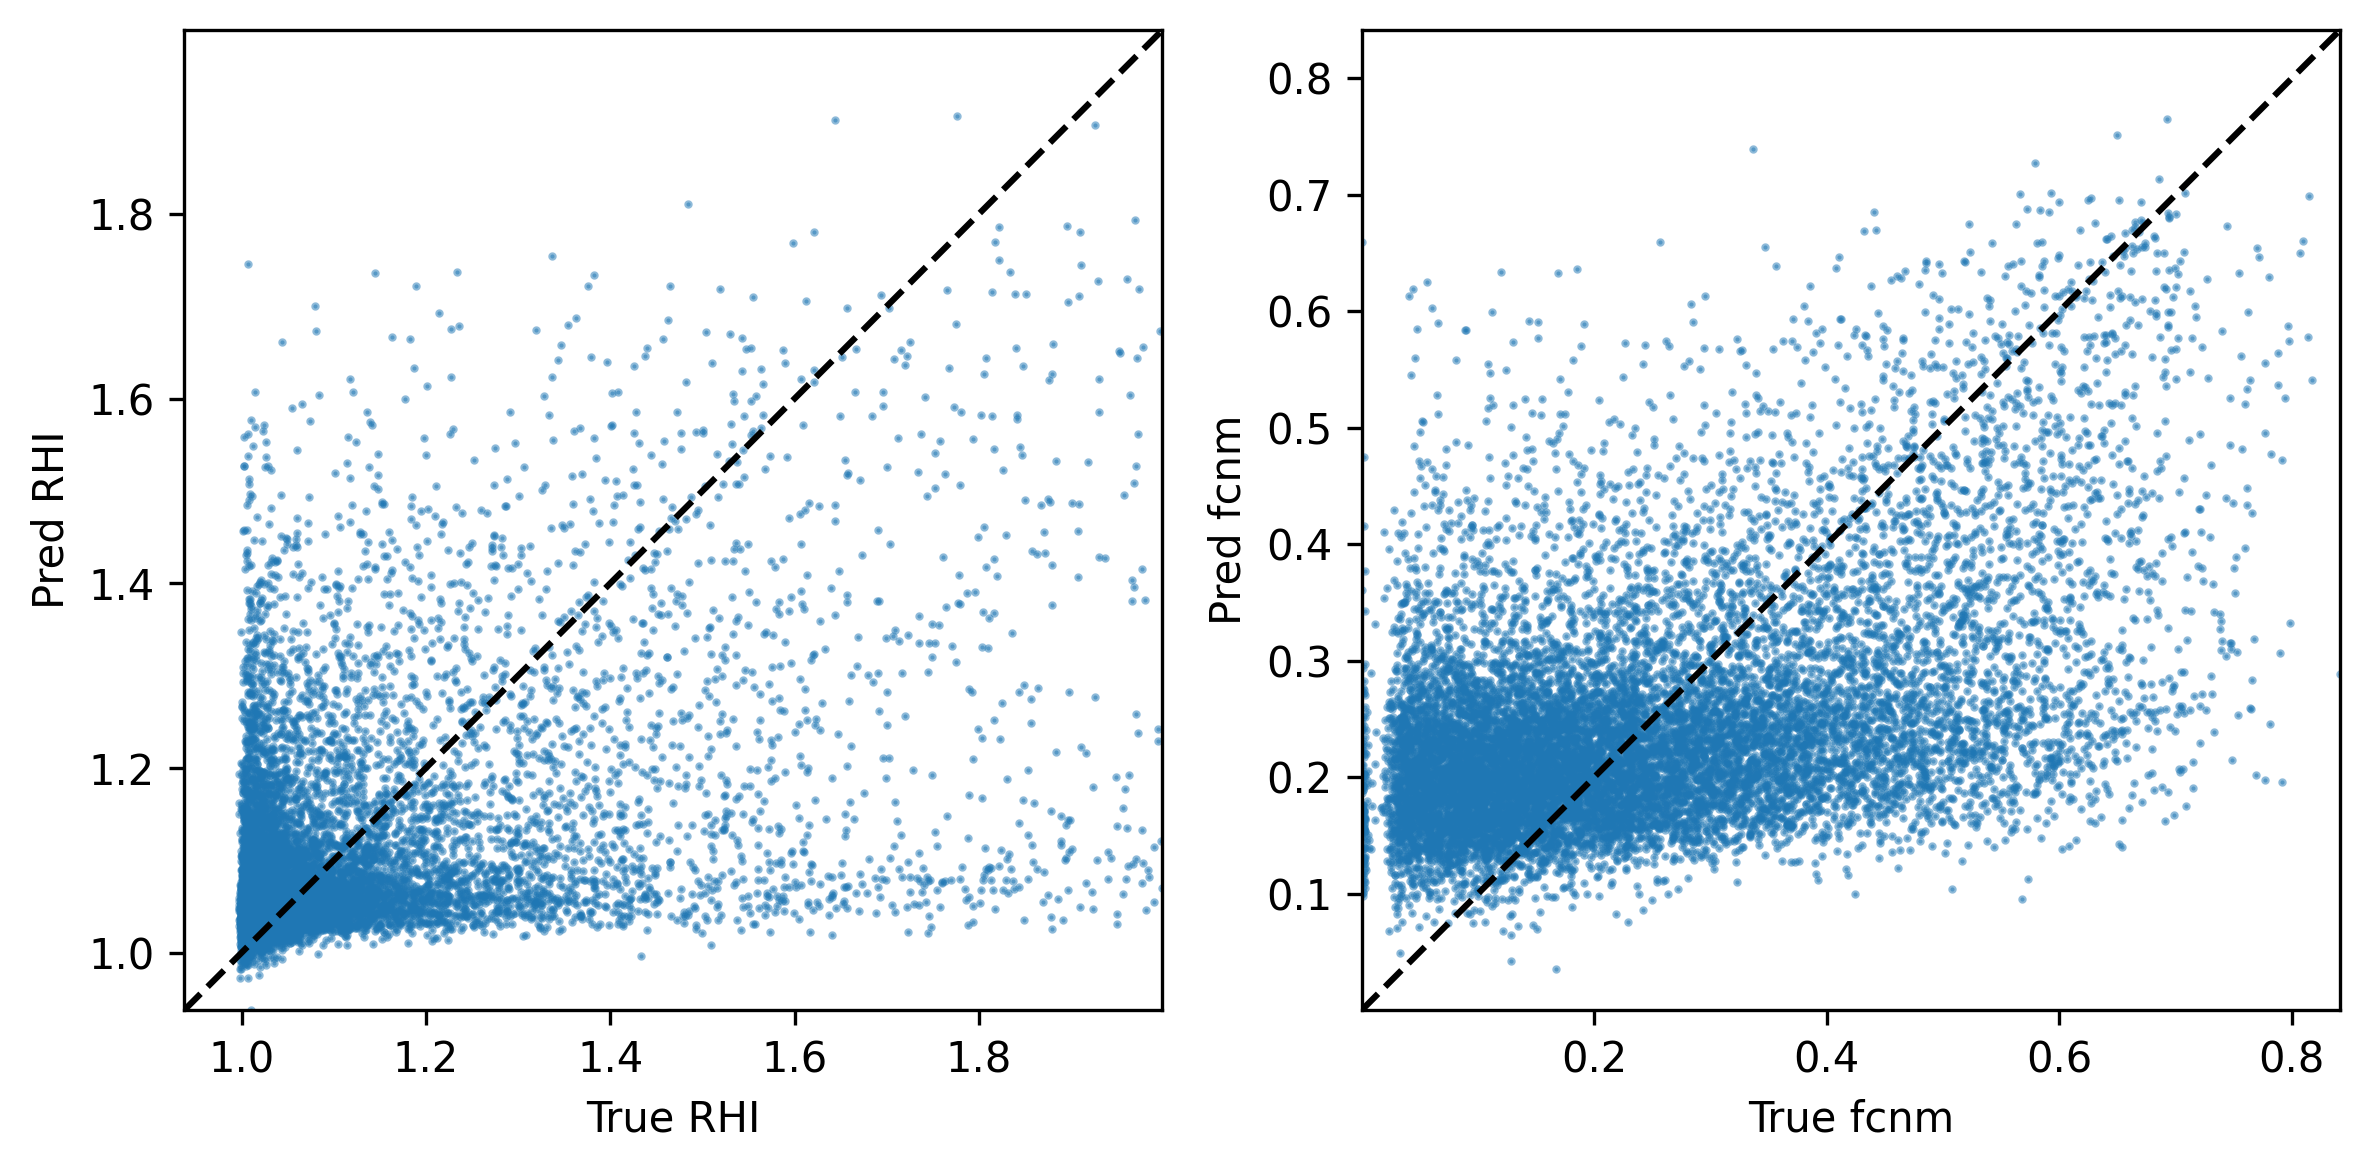

In [11]:
m1=pd.read_csv('5_test_predictions20251120_175412.csv')
plt.figure(figsize=(8,4),dpi=300)
plt.subplot(121)
plt.scatter(m1['RHI_true'],m1['RHI_pred'],s=1,alpha=0.5)
lo, hi = float(min(m1['RHI_true'].min(), m1['RHI_pred'].min())), float(max(m1['RHI_true'].max(), m1['RHI_pred'].max()))
plt.plot([lo, hi], [lo, hi],'k--')
plt.xlabel(f"True RHI")
plt.ylabel(f"Pred RHI")
plt.xlim(lo, hi)
plt.ylim(lo, hi)

plt.subplot(122)
plt.scatter(m1['fcnm_true'],m1['fcnm_pred'],s=1,alpha=0.5)
lo, hi = float(min(m1['fcnm_true'].min(), m1['fcnm_pred'].min())), float(max(m1['fcnm_true'].max(), m1['fcnm_pred'].max()))
plt.plot([lo, hi], [lo, hi],'k--')
plt.xlabel(f"True fcnm")
plt.ylabel(f"Pred fcnm")
plt.xlim(lo, hi)
plt.ylim(lo, hi)
plt.tight_layout()

Text(0, 0.5, 'Loss')

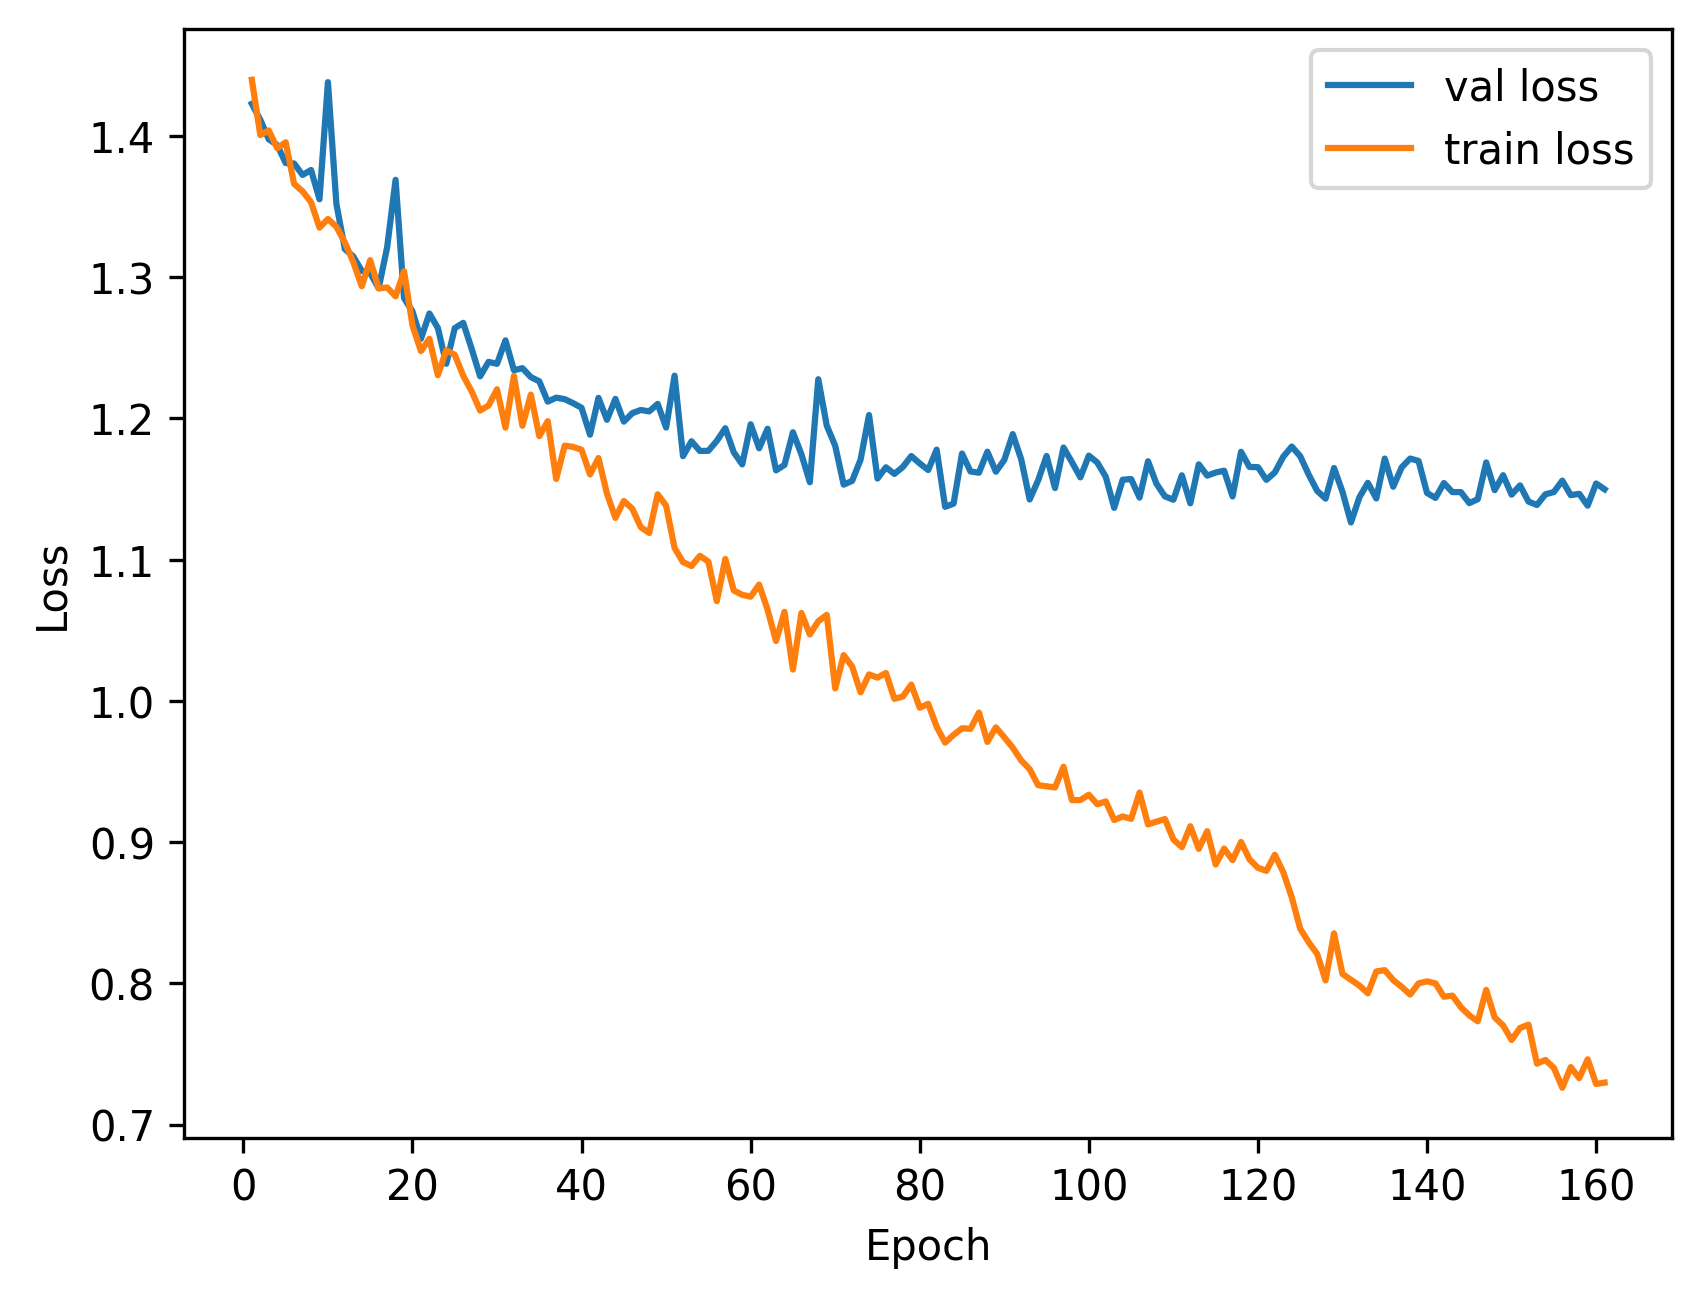

In [12]:
m1_log=pd.read_csv('5_training_log20251120_175412.csv')
plt.figure(dpi=300)
plt.plot(m1_log['epoch'], m1_log['val_loss'],label='val loss')
plt.plot(m1_log['epoch'], m1_log['train_loss'],label='train loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')

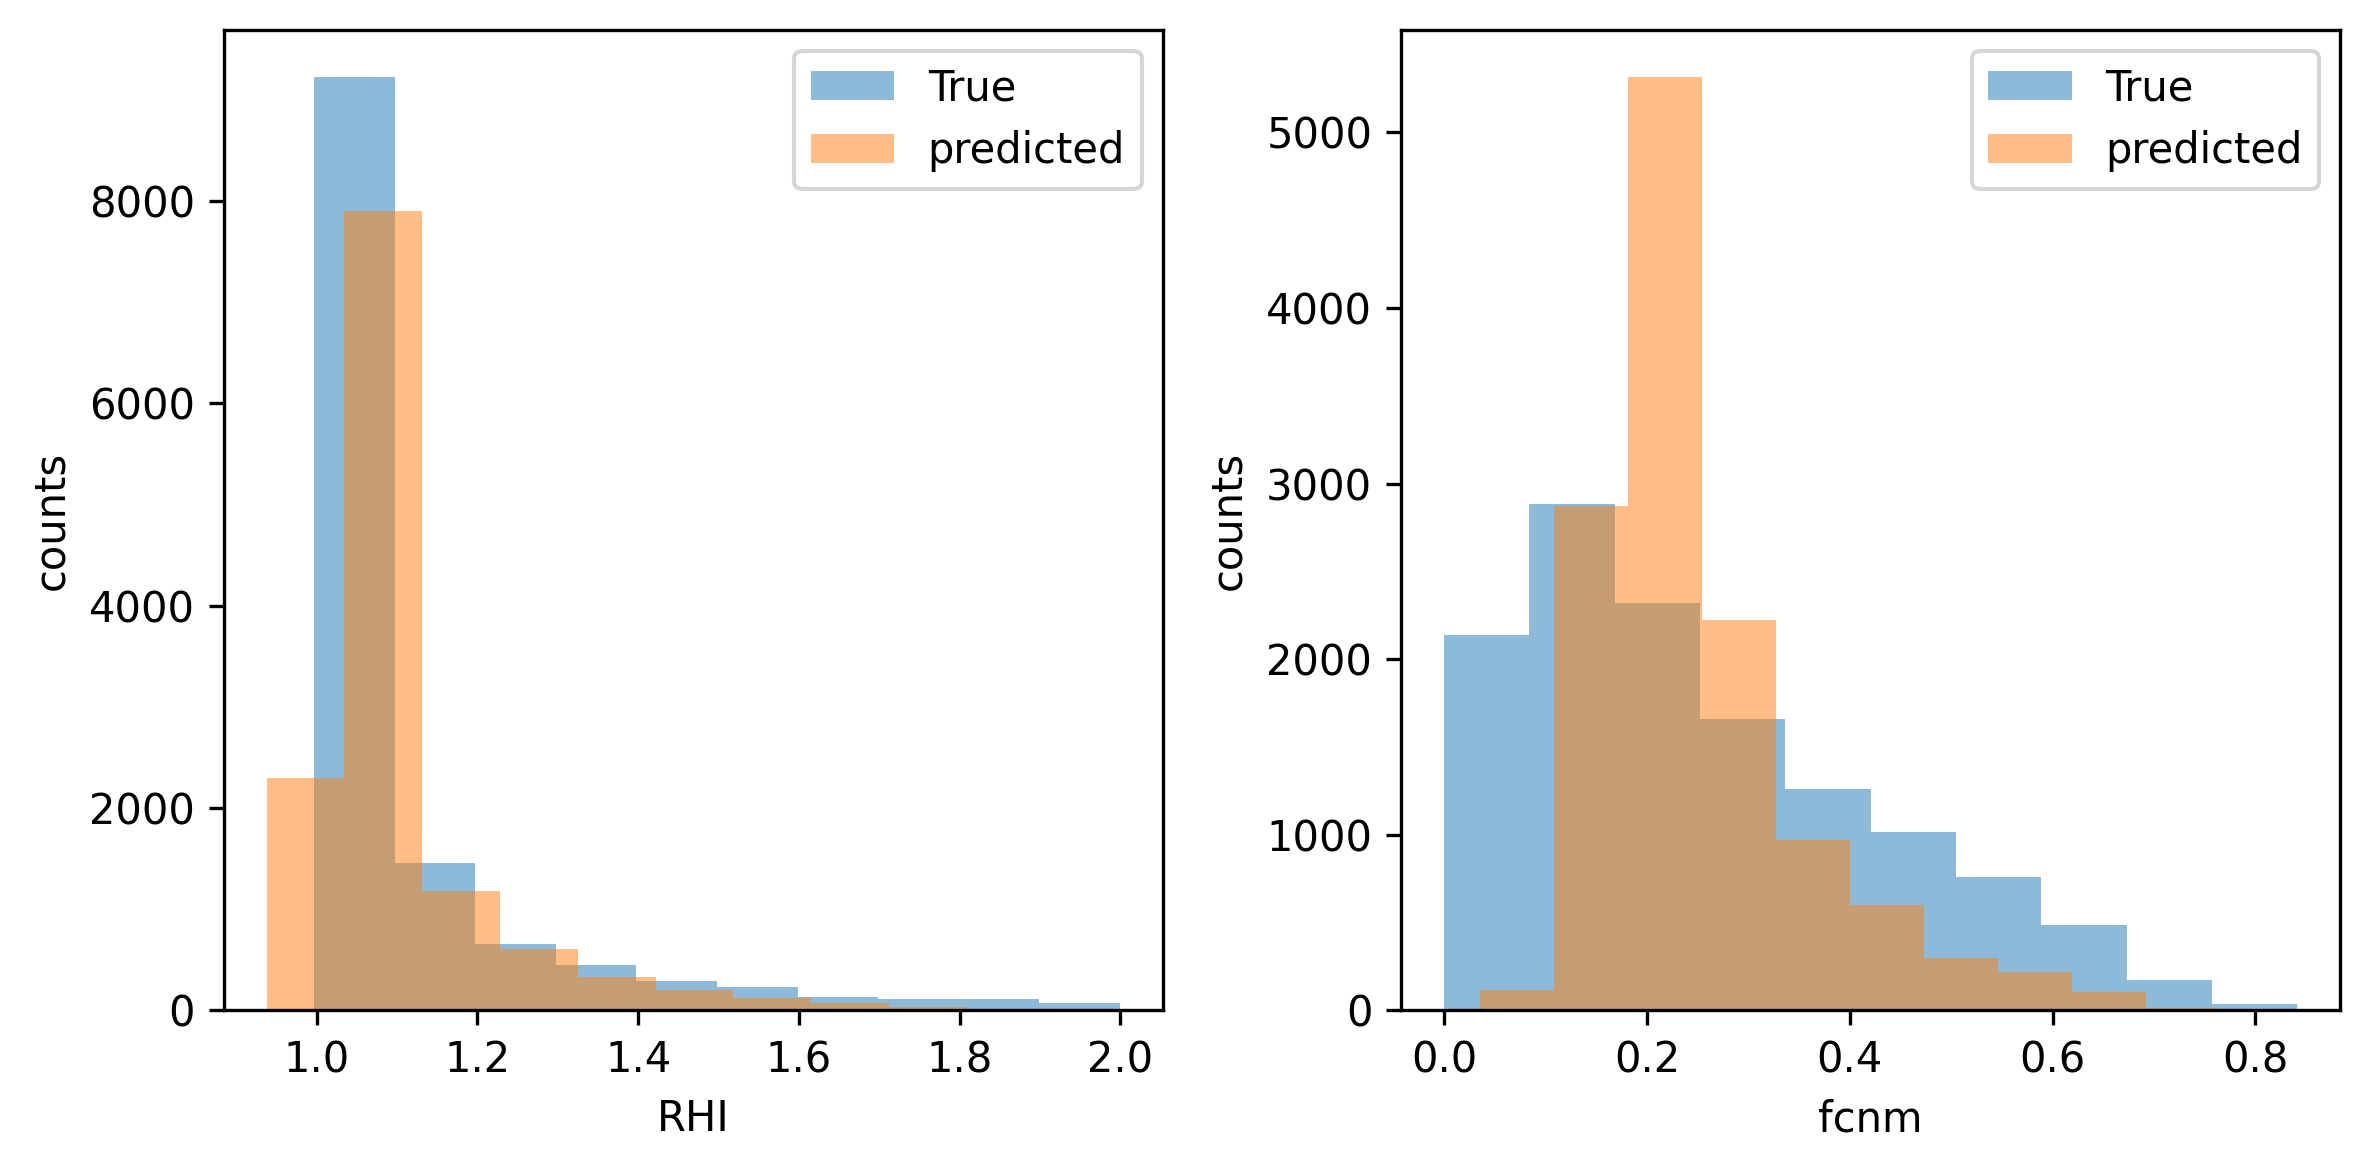

In [13]:
m1=pd.read_csv('5_test_predictions20251120_175412.csv')
plt.figure(figsize=(8,4),dpi=300)
plt.subplot(121)
plt.hist(m1['RHI_true'],alpha=0.5,label='True')
plt.hist(m1['RHI_pred'],alpha=0.5,label='predicted')
plt.xlabel(f"RHI")
plt.ylabel(f"counts")
plt.legend()


plt.subplot(122)
plt.hist(m1['fcnm_true'],alpha=0.5,label='True')
plt.hist(m1['fcnm_pred'],alpha=0.5,label='predicted')
plt.xlabel(f"fcnm")
plt.ylabel(f"counts")
plt.legend()
plt.tight_layout()